# DSC680 Project 1
# Stock Market Analysis with technical indicators and preditions -Part Two

pip install scikit-learn --upgrade --no-cache-dir --pre

In [1]:
# Import Modules
import os
import sys

import json
from pathlib import Path
import numpy as np
import pandas as pd
import os
import random
import copy
import matplotlib.pyplot as plt
import pandas

In [2]:
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
yf.pdr_override()

## Setup start and end time to read the data

In [3]:
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)
print(start,' ', end)
stock_list = ['AAPL','META','NFLX','NVDA','CRM', 'GOOG', 'MSFT', 'AMZN']


2013-09-22 00:00:00   2023-09-22 16:34:50.387288


## Pull data from yfinance and store Data in a dataframe. Add Label column, configure Data column.

In [4]:
data = []
for stock in stock_list:
    df = yf.download(stock, start, end)
    df = df.reset_index()
    df['Label'] = stock
    df['Date'] = pd.to_datetime(df['Date'])
    data.append(df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Examine Data

In [5]:
data[0].head()

Date       Open       High        Low      Close  Adj Close  \
0 2013-09-23  17.717857  17.746786  17.235714  17.522858  15.293091   
1 2013-09-24  17.674286  17.695356  17.422144  17.467857  15.245087   
2 2013-09-25  17.471430  17.487143  17.193930  17.197500  15.009136   
3 2013-09-26  17.357143  17.448570  17.282143  17.365000  15.155317   
4 2013-09-27  17.277857  17.309643  17.168571  17.241072  15.047164   

      Volume Label  
0  762106800  AAPL  
1  364344400  AAPL  
2  316957200  AAPL  
3  237221600  AAPL  
4  228040400  AAPL

In [6]:
data[1].head()

Date       Open       High        Low      Close  Adj Close  \
0 2013-09-23  47.279999  47.549999  46.290001  47.189999  47.189999   
1 2013-09-24  48.509998  49.660000  48.160000  48.450001  48.450001   
2 2013-09-25  49.230000  49.540001  48.459999  49.459999  49.459999   
3 2013-09-26  50.009998  50.599998  49.500000  50.389999  50.389999   
4 2013-09-27  50.290001  51.279999  49.860001  51.240002  51.240002   

      Volume Label  
0   75177000  META  
1  136716100  META  
2   87879700  META  
3   98220100  META  
4   81410500  META

In [7]:
print(len(data))

8


## Add Technical Indicators to the dataframe

Calculate these technical indicators
- RSI
- Volume (plain)
- Bollinger Bands
- Aroon Oscillator
- Price Volume Trend
- acceleration bands

In [8]:
TechIndicator = copy.deepcopy(data)

## Calculation of Relative Strength Index (RSI)

### Relative Strength Index
### PriceUp = Price > 0
### PriceDown = Price < 0
### Avg(PriceUp)/(Avg(PriceUP)+Avg(PriceDown)*100
### Where: PriceUp(t)=1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)>0};
### PriceDown(t)=-1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)<0};


In [9]:
def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)


## Add Momentum_1D column for all stocks.
## Momentum_1D = P(t) - P(t-1)

In [10]:

for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Momentum_1D'] = (TechIndicator[stock]['Close']-TechIndicator[stock]['Close'].shift(1)).fillna(0)
    TechIndicator[stock]['RSI_14D'] = TechIndicator[stock]['Momentum_1D'].rolling(center=False, window=14).apply(rsi).fillna(0)
TechIndicator[1].tail(5)

Date        Open        High         Low       Close   Adj Close  \
2513 2023-09-18  298.190002  303.600006  297.799988  302.549988  302.549988   
2514 2023-09-19  302.480011  306.170013  299.809998  305.070007  305.070007   
2515 2023-09-20  305.049988  308.059998  299.429993  299.670013  299.670013   
2516 2023-09-21  295.700012  300.260010  293.269989  295.730011  295.730011   
2517 2023-09-22  299.299988  305.350006  298.279999  299.079987  299.079987   

        Volume Label  Momentum_1D    RSI_14D  
2513  14234200  META     2.239990  53.712195  
2514  15924400  META     2.520020  49.658212  
2515  19379500  META    -5.399994  47.013273  
2516  21300500  META    -3.940002  49.861252  
2517  24416005  META     3.349976  52.230655

In [11]:
TechIndicator[1].head(5)

Date       Open       High        Low      Close  Adj Close  \
0 2013-09-23  47.279999  47.549999  46.290001  47.189999  47.189999   
1 2013-09-24  48.509998  49.660000  48.160000  48.450001  48.450001   
2 2013-09-25  49.230000  49.540001  48.459999  49.459999  49.459999   
3 2013-09-26  50.009998  50.599998  49.500000  50.389999  50.389999   
4 2013-09-27  50.290001  51.279999  49.860001  51.240002  51.240002   

      Volume Label  Momentum_1D  RSI_14D  
0   75177000  META     0.000000      0.0  
1  136716100  META     1.260002      0.0  
2   87879700  META     1.009998      0.0  
3   98220100  META     0.930000      0.0  
4   81410500  META     0.850002      0.0

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import numpy as np

In [13]:
#Cleanup the 'Volume' column.
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Volume_plain'] = TechIndicator[stock]['Volume'].fillna(0)
TechIndicator[0].tail()

Date        Open        High         Low       Close   Adj Close  \
2513 2023-09-18  176.479996  179.380005  176.169998  177.970001  177.970001   
2514 2023-09-19  177.520004  179.630005  177.130005  179.070007  179.070007   
2515 2023-09-20  179.259995  179.699997  175.399994  175.490005  175.490005   
2516 2023-09-21  174.550003  176.300003  173.860001  173.929993  173.929993   
2517 2023-09-22  174.669998  177.078995  174.054993  174.789993  174.789993   

        Volume Label  Momentum_1D    RSI_14D  Volume_plain  
2513  67257600  AAPL     2.960007  32.755617      67257600  
2514  51826900  AAPL     1.100006  28.564528      51826900  
2515  58436200  AAPL    -3.580002  24.686222      58436200  
2516  63047900  AAPL    -1.560013  28.474387      63047900  
2517  55110610  AAPL     0.860001  26.824641      55110610

## Calculation of Bollinger Bands
## Calculate average closing value for given period(i.e. 30 days)
## Calculate standard deviation of closing value for the given period(i.e. 30 days)
## Calculate the upper band
* upperband = average + standard deviation * number of standard deviations(i.e. 3)

## Calculate the lower band
* lowerband = average - standard deviation * number of standard deviations(i.e. 3)

In [14]:
def bbands(price, length=30, numsd=3):    
    ave = price.rolling(window = length, center = False).mean()    
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

In [15]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['BB_Middle_Band'], TechIndicator[stock]['BB_Upper_Band'], TechIndicator[stock]['BB_Lower_Band'] = bbands(TechIndicator[stock]['Close'], length=30, numsd=3)
    TechIndicator[stock]['BB_Middle_Band'] = TechIndicator[stock]['BB_Middle_Band'].fillna(0)
    TechIndicator[stock]['BB_Upper_Band'] = TechIndicator[stock]['BB_Upper_Band'].fillna(0)
    TechIndicator[stock]['BB_Lower_Band'] = TechIndicator[stock]['BB_Lower_Band'].fillna(0)
TechIndicator[0].tail()

Date        Open        High         Low       Close   Adj Close  \
2513 2023-09-18  176.479996  179.380005  176.169998  177.970001  177.970001   
2514 2023-09-19  177.520004  179.630005  177.130005  179.070007  179.070007   
2515 2023-09-20  179.259995  179.699997  175.399994  175.490005  175.490005   
2516 2023-09-21  174.550003  176.300003  173.860001  173.929993  173.929993   
2517 2023-09-22  174.669998  177.078995  174.054993  174.789993  174.789993   

        Volume Label  Momentum_1D    RSI_14D  Volume_plain  BB_Middle_Band  \
2513  67257600  AAPL     2.960007  32.755617      67257600         179.333   
2514  51826900  AAPL     1.100006  28.564528      51826900         179.340   
2515  58436200  AAPL    -3.580002  24.686222      58436200         179.196   
2516  63047900  AAPL    -1.560013  28.474387      63047900         179.054   
2517  55110610  AAPL     0.860001  26.824641      55110610         178.948   

      BB_Upper_Band  BB_Lower_Band  
2513        192.516        166.149  
2514        192.522        166.158  
2515        192.542        165.851  
2516        192.700        165.409  
2517        192.782        165.114

## Calculation of Aroon Oscillator
###  Aroon-Up = (25 – Number of Days Since Recent 25-day High / 25)* 100

### Aroon-Down = (25 – Number of Days Since Recent 25-day Low / 25) * 100


In [16]:
def Aroon_Oscillator(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df['Date']):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [17]:
for stock in range(len(TechIndicator)):
    listofzeros = [0] * 25
    up, down = Aroon_Oscillator(TechIndicator[stock])
    aroon_list = [x - y for x, y in zip(up,down)]
    if len(aroon_list)==0:
        aroon_list = [0] * TechIndicator[stock].shape[0]
        TechIndicator[stock]['Aroon_Oscillator'] = aroon_list
    else:
        TechIndicator[stock]['Aroon_Oscillator'] = listofzeros+aroon_list


In [18]:
TechIndicator[0].head()

Date       Open       High        Low      Close  Adj Close  \
0 2013-09-23  17.717857  17.746786  17.235714  17.522858  15.293091   
1 2013-09-24  17.674286  17.695356  17.422144  17.467857  15.245087   
2 2013-09-25  17.471430  17.487143  17.193930  17.197500  15.009136   
3 2013-09-26  17.357143  17.448570  17.282143  17.365000  15.155317   
4 2013-09-27  17.277857  17.309643  17.168571  17.241072  15.047164   

      Volume Label  Momentum_1D  RSI_14D  Volume_plain  BB_Middle_Band  \
0  762106800  AAPL     0.000000      0.0     762106800             0.0   
1  364344400  AAPL    -0.055000      0.0     364344400             0.0   
2  316957200  AAPL    -0.270357      0.0     316957200             0.0   
3  237221600  AAPL     0.167500      0.0     237221600             0.0   
4  228040400  AAPL    -0.123928      0.0     228040400             0.0   

   BB_Upper_Band  BB_Lower_Band  Aroon_Oscillator  
0            0.0            0.0               0.0  
1            0.0            0.0               0.0  
2            0.0            0.0               0.0  
3            0.0            0.0               0.0  
4            0.0            0.0               0.0

In [19]:
TechIndicator[0].tail()

Date        Open        High         Low       Close   Adj Close  \
2513 2023-09-18  176.479996  179.380005  176.169998  177.970001  177.970001   
2514 2023-09-19  177.520004  179.630005  177.130005  179.070007  179.070007   
2515 2023-09-20  179.259995  179.699997  175.399994  175.490005  175.490005   
2516 2023-09-21  174.550003  176.300003  173.860001  173.929993  173.929993   
2517 2023-09-22  174.669998  177.078995  174.054993  174.789993  174.789993   

        Volume Label  Momentum_1D    RSI_14D  Volume_plain  BB_Middle_Band  \
2513  67257600  AAPL     2.960007  32.755617      67257600         179.333   
2514  51826900  AAPL     1.100006  28.564528      51826900         179.340   
2515  58436200  AAPL    -3.580002  24.686222      58436200         179.196   
2516  63047900  AAPL    -1.560013  28.474387      63047900         179.054   
2517  55110610  AAPL     0.860001  26.824641      55110610         178.948   

      BB_Upper_Band  BB_Lower_Band  Aroon_Oscillator  
2513        192.516        166.149              44.0  
2514        192.522        166.158              44.0  
2515        192.542        165.851              44.0  
2516        192.700        165.409              44.0  
2517        192.782        165.114              44.0

## Calculation of Price Volume Trend
### PVT =  [((CurrentClose - PreviousClose) / PreviousClose) x Volume]
### PVT = PVT+ PreviousPVT

In [20]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]["PVT"] = (TechIndicator[stock]['Momentum_1D']/ TechIndicator[stock]['Close'].shift(1))*TechIndicator[stock]['Volume_plain']
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"]+TechIndicator[stock]["PVT"].shift(1)
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"].fillna(0)
TechIndicator[0].tail()

Date        Open        High         Low       Close   Adj Close  \
2513 2023-09-18  176.479996  179.380005  176.169998  177.970001  177.970001   
2514 2023-09-19  177.520004  179.630005  177.130005  179.070007  179.070007   
2515 2023-09-20  179.259995  179.699997  175.399994  175.490005  175.490005   
2516 2023-09-21  174.550003  176.300003  173.860001  173.929993  173.929993   
2517 2023-09-22  174.669998  177.078995  174.054993  174.789993  174.789993   

        Volume Label  Momentum_1D    RSI_14D  Volume_plain  BB_Middle_Band  \
2513  67257600  AAPL     2.960007  32.755617      67257600         179.333   
2514  51826900  AAPL     1.100006  28.564528      51826900         179.340   
2515  58436200  AAPL    -3.580002  24.686222      58436200         179.196   
2516  63047900  AAPL    -1.560013  28.474387      63047900         179.054   
2517  55110610  AAPL     0.860001  26.824641      55110610         178.948   

      BB_Upper_Band  BB_Lower_Band  Aroon_Oscillator           PVT  
2513        192.516        166.149              44.0  6.839220e+05  
2514        192.522        166.158              44.0  1.457886e+06  
2515        192.542        165.851              44.0 -8.479333e+05  
2516        192.700        165.409              44.0 -1.728730e+06  
2517        192.782        165.114              44.0 -2.879667e+05

### Calculation of Acceleration Bands

lower envelope bands around a simple moving average. 

In [21]:
def abands(df):
    df['AB_Middle_Band'] = df['Close'].rolling(window = 20, center=False).mean()
    df['aupband'] = df['High'] * (1 + 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Upper_Band'] = df['aupband'].rolling(window=20, center=False).mean()
    df['adownband'] = df['Low'] * (1 - 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Lower_Band'] = df['adownband'].rolling(window=20, center=False).mean()

In [22]:
for stock in range(len(TechIndicator)):
    abands(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

Date        Open        High         Low       Close   Adj Close  \
2513 2023-09-18  176.479996  179.380005  176.169998  177.970001  177.970001   
2514 2023-09-19  177.520004  179.630005  177.130005  179.070007  179.070007   
2515 2023-09-20  179.259995  179.699997  175.399994  175.490005  175.490005   
2516 2023-09-21  174.550003  176.300003  173.860001  173.929993  173.929993   
2517 2023-09-22  174.669998  177.078995  174.054993  174.789993  174.789993   

        Volume Label  Momentum_1D    RSI_14D  ...  BB_Middle_Band  \
2513  67257600  AAPL     2.960007  32.755617  ...         179.333   
2514  51826900  AAPL     1.100006  28.564528  ...         179.340   
2515  58436200  AAPL    -3.580002  24.686222  ...         179.196   
2516  63047900  AAPL    -1.560013  28.474387  ...         179.054   
2517  55110610  AAPL     0.860001  26.824641  ...         178.948   

      BB_Upper_Band  BB_Lower_Band  Aroon_Oscillator           PVT  \
2513        192.516        166.149              44.0  6.839220e+05   
2514        192.522        166.158              44.0  1.457886e+06   
2515        192.542        165.851              44.0 -8.479333e+05   
2516        192.700        165.409              44.0 -1.728730e+06   
2517        192.782        165.114              44.0 -2.879667e+05   

      AB_Middle_Band     aupband  AB_Upper_Band   adownband  AB_Lower_Band  
2513      180.270499  185.857980     188.438023  169.807946     171.898018  
2514      180.432000  184.665042     188.624142  172.165042     172.056637  
2515      180.345000  188.404143     189.016773  166.904128     171.731765  
2516      179.985500  181.214013     188.675092  169.014001     171.585084  
2517      179.906000  183.179085     188.262790  168.059075     171.689285  

[5 rows x 21 columns]

## Cleanup the tables

In [23]:
columns2Drop = ['Momentum_1D', 'aupband', 'adownband']
for stock in range(len(TechIndicator)):
    TechIndicator[stock] = TechIndicator[stock].drop(labels = columns2Drop, axis=1)
TechIndicator[0].head()

Date       Open       High        Low      Close  Adj Close  \
0 2013-09-23  17.717857  17.746786  17.235714  17.522858  15.293091   
1 2013-09-24  17.674286  17.695356  17.422144  17.467857  15.245087   
2 2013-09-25  17.471430  17.487143  17.193930  17.197500  15.009136   
3 2013-09-26  17.357143  17.448570  17.282143  17.365000  15.155317   
4 2013-09-27  17.277857  17.309643  17.168571  17.241072  15.047164   

      Volume Label  RSI_14D  Volume_plain  BB_Middle_Band  BB_Upper_Band  \
0  762106800  AAPL      0.0     762106800             0.0            0.0   
1  364344400  AAPL      0.0     364344400             0.0            0.0   
2  316957200  AAPL      0.0     316957200             0.0            0.0   
3  237221600  AAPL      0.0     237221600             0.0            0.0   
4  228040400  AAPL      0.0     228040400             0.0            0.0   

   BB_Lower_Band  Aroon_Oscillator           PVT  AB_Middle_Band  \
0            0.0               0.0  0.000000e+00             0.0   
1            0.0               0.0  0.000000e+00             0.0   
2            0.0               0.0 -6.049271e+06             0.0   
3            0.0               0.0 -2.595194e+06             0.0   
4            0.0               0.0  6.830353e+05             0.0   

   AB_Upper_Band  AB_Lower_Band  
0            0.0            0.0  
1            0.0            0.0  
2            0.0            0.0  
3            0.0            0.0  
4            0.0            0.0

# Visualization of technical indicators

In [24]:
# Index the Data column for visulization
for stock in range(len(TechIndicator)):
    TechIndicator[stock].index = TechIndicator[stock]['Date']
    TechIndicator[stock] = TechIndicator[stock].drop(labels = ['Date'], axis = 1)


In [25]:
TechIndicator[0].head()

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2013-09-23  17.717857  17.746786  17.235714  17.522858  15.293091  762106800   
2013-09-24  17.674286  17.695356  17.422144  17.467857  15.245087  364344400   
2013-09-25  17.471430  17.487143  17.193930  17.197500  15.009136  316957200   
2013-09-26  17.357143  17.448570  17.282143  17.365000  15.155317  237221600   
2013-09-27  17.277857  17.309643  17.168571  17.241072  15.047164  228040400   

           Label  RSI_14D  Volume_plain  BB_Middle_Band  BB_Upper_Band  \
Date                                                                     
2013-09-23  AAPL      0.0     762106800             0.0            0.0   
2013-09-24  AAPL      0.0     364344400             0.0            0.0   
2013-09-25  AAPL      0.0     316957200             0.0            0.0   
2013-09-26  AAPL      0.0     237221600             0.0            0.0   
2013-09-27  AAPL      0.0     228040400             0.0            0.0   

            BB_Lower_Band  Aroon_Oscillator           PVT  AB_Middle_Band  \
Date                                                                        
2013-09-23            0.0               0.0  0.000000e+00             0.0   
2013-09-24            0.0               0.0  0.000000e+00             0.0   
2013-09-25            0.0               0.0 -6.049271e+06             0.0   
2013-09-26            0.0               0.0 -2.595194e+06             0.0   
2013-09-27            0.0               0.0  6.830353e+05             0.0   

            AB_Upper_Band  AB_Lower_Band  
Date                                      
2013-09-23            0.0            0.0  
2013-09-24            0.0            0.0  
2013-09-25            0.0            0.0  
2013-09-26            0.0            0.0  
2013-09-27            0.0            0.0

## Plot Relative Strength Index(RSI)

C:\Users\anjal\AppData\Local\Temp\ipykernel_34436\649242465.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title(str(TechIndicator[i]['Label'][0]))


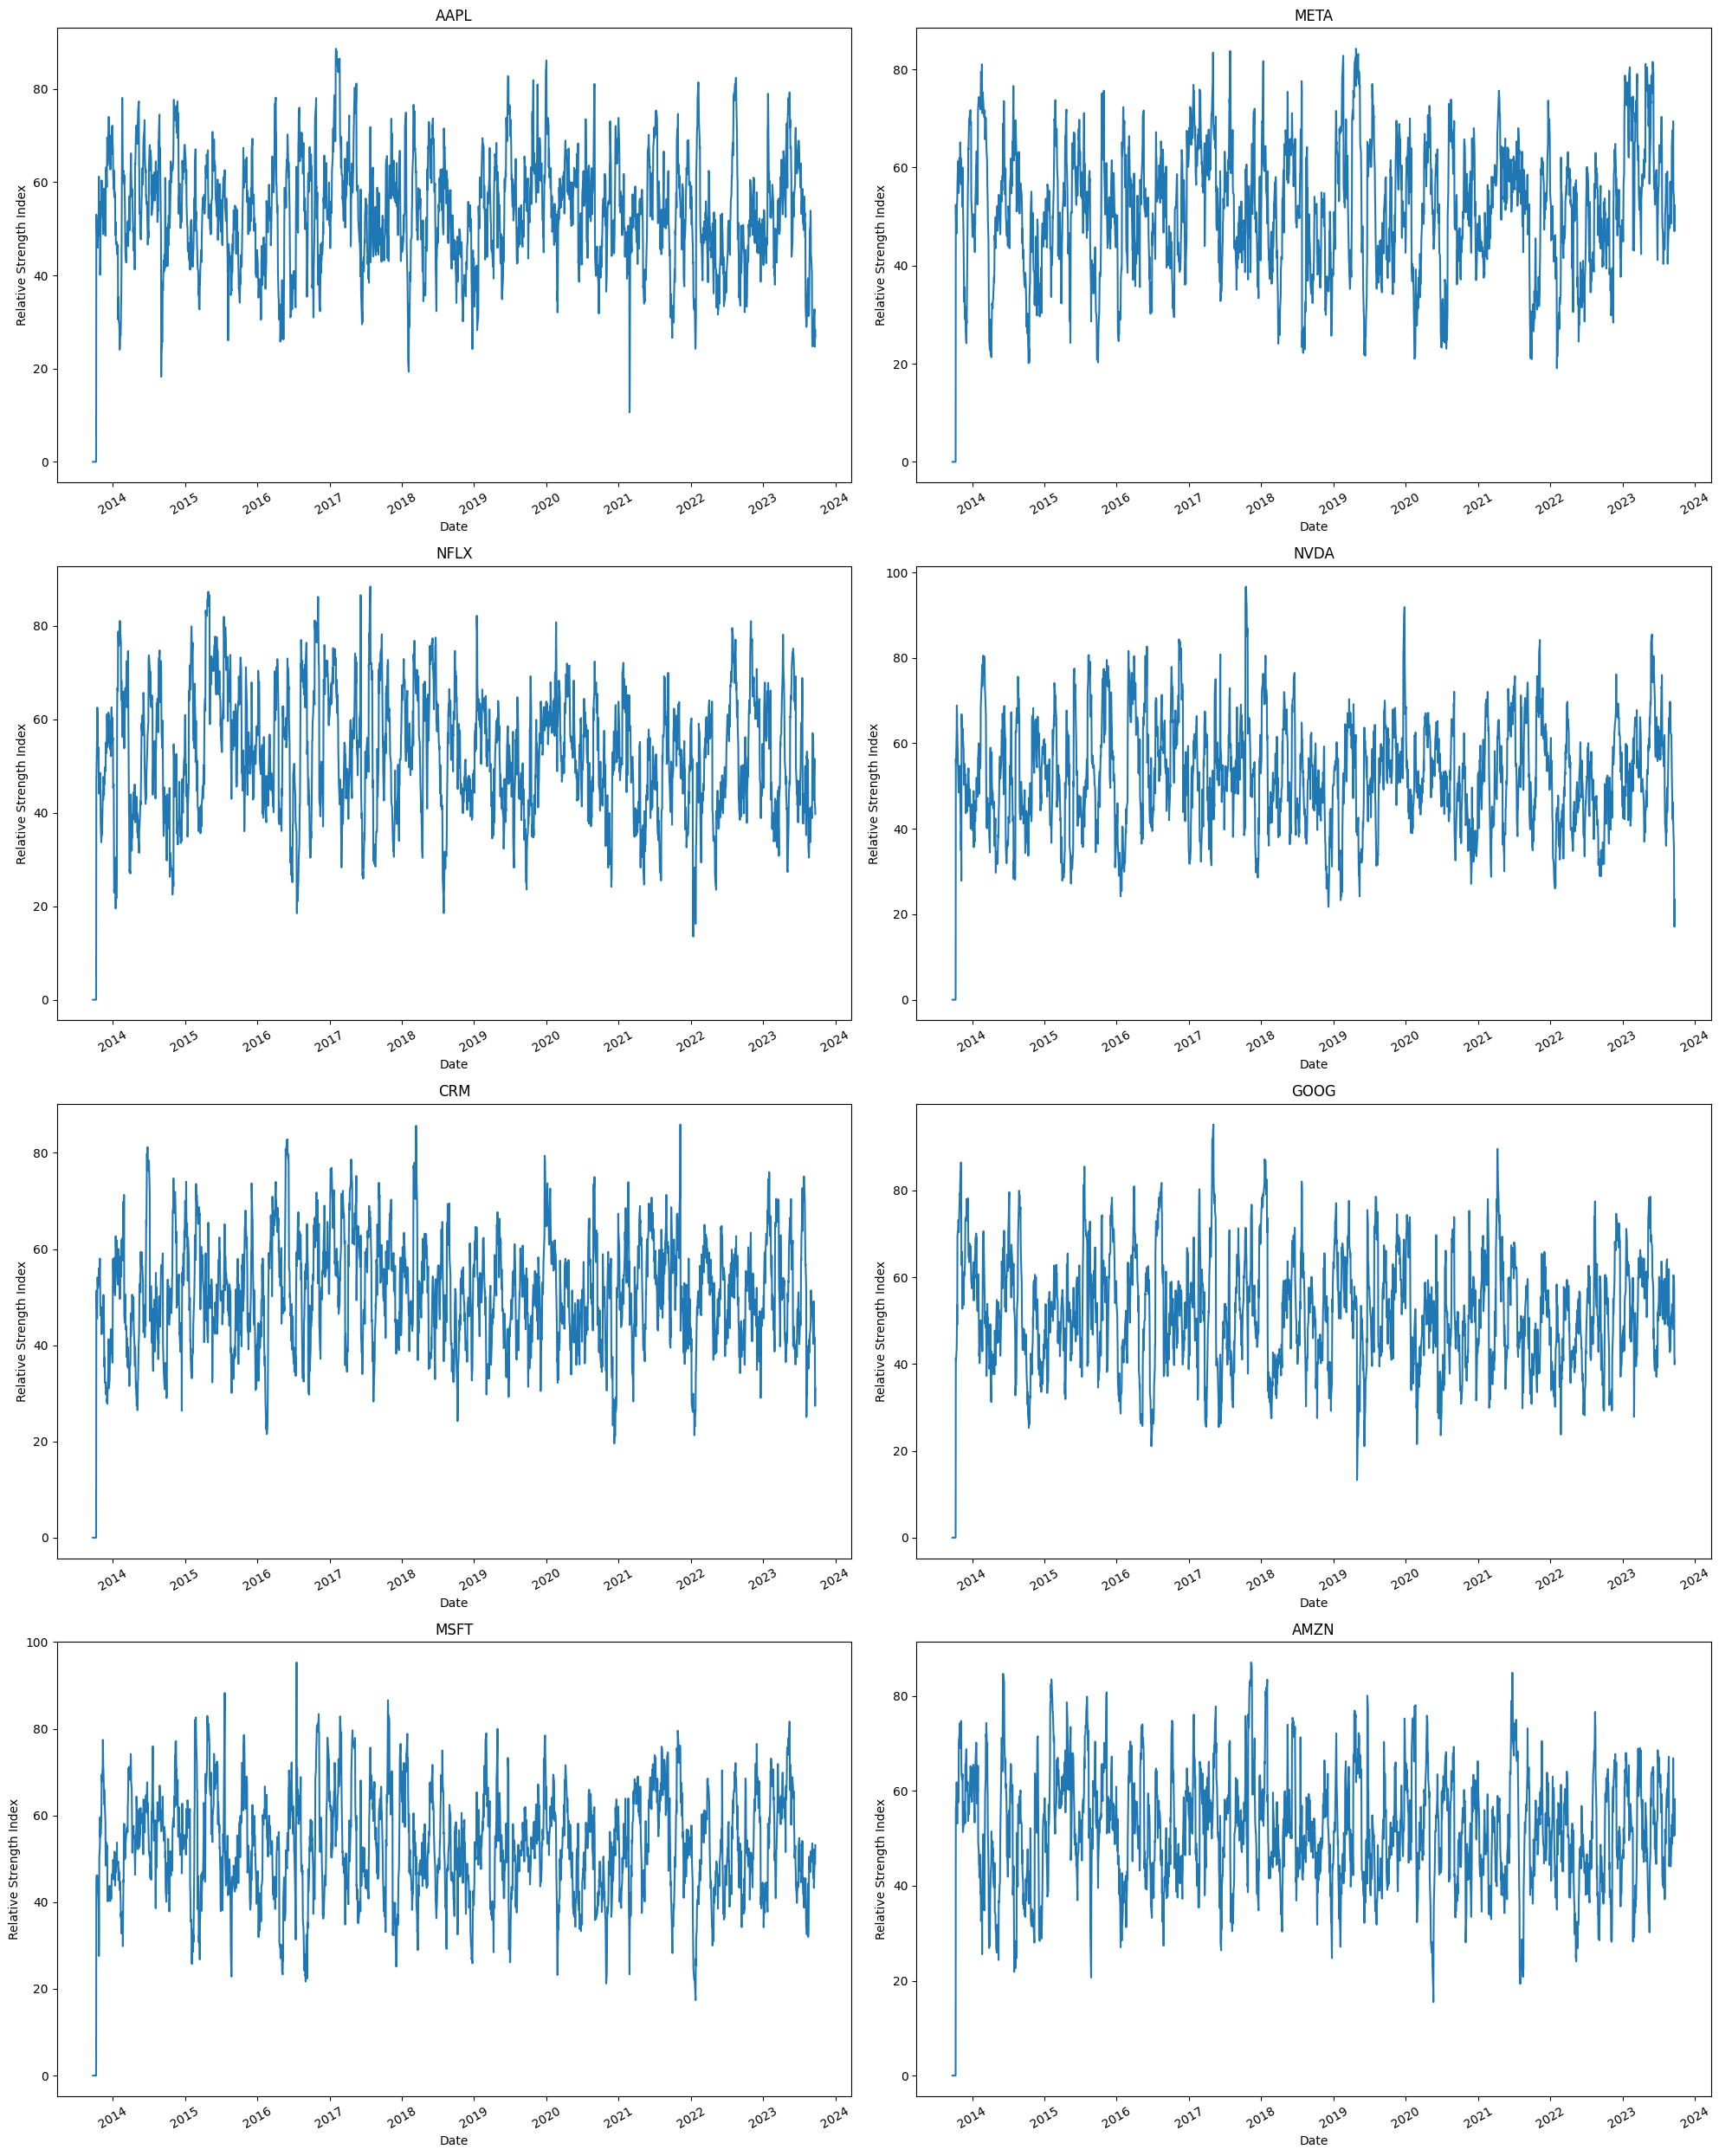

In [26]:
%matplotlib inline
fig = plt.figure(figsize=(20,25))
for i in range(len(TechIndicator)):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['RSI_14D'])
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Relative Strength Index")
    plt.xticks(rotation=30)
fig.tight_layout()

## Plot Plain Volume  

C:\Users\anjal\AppData\Local\Temp\ipykernel_34436\1084180687.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title(str(TechIndicator[i]['Label'][0]))


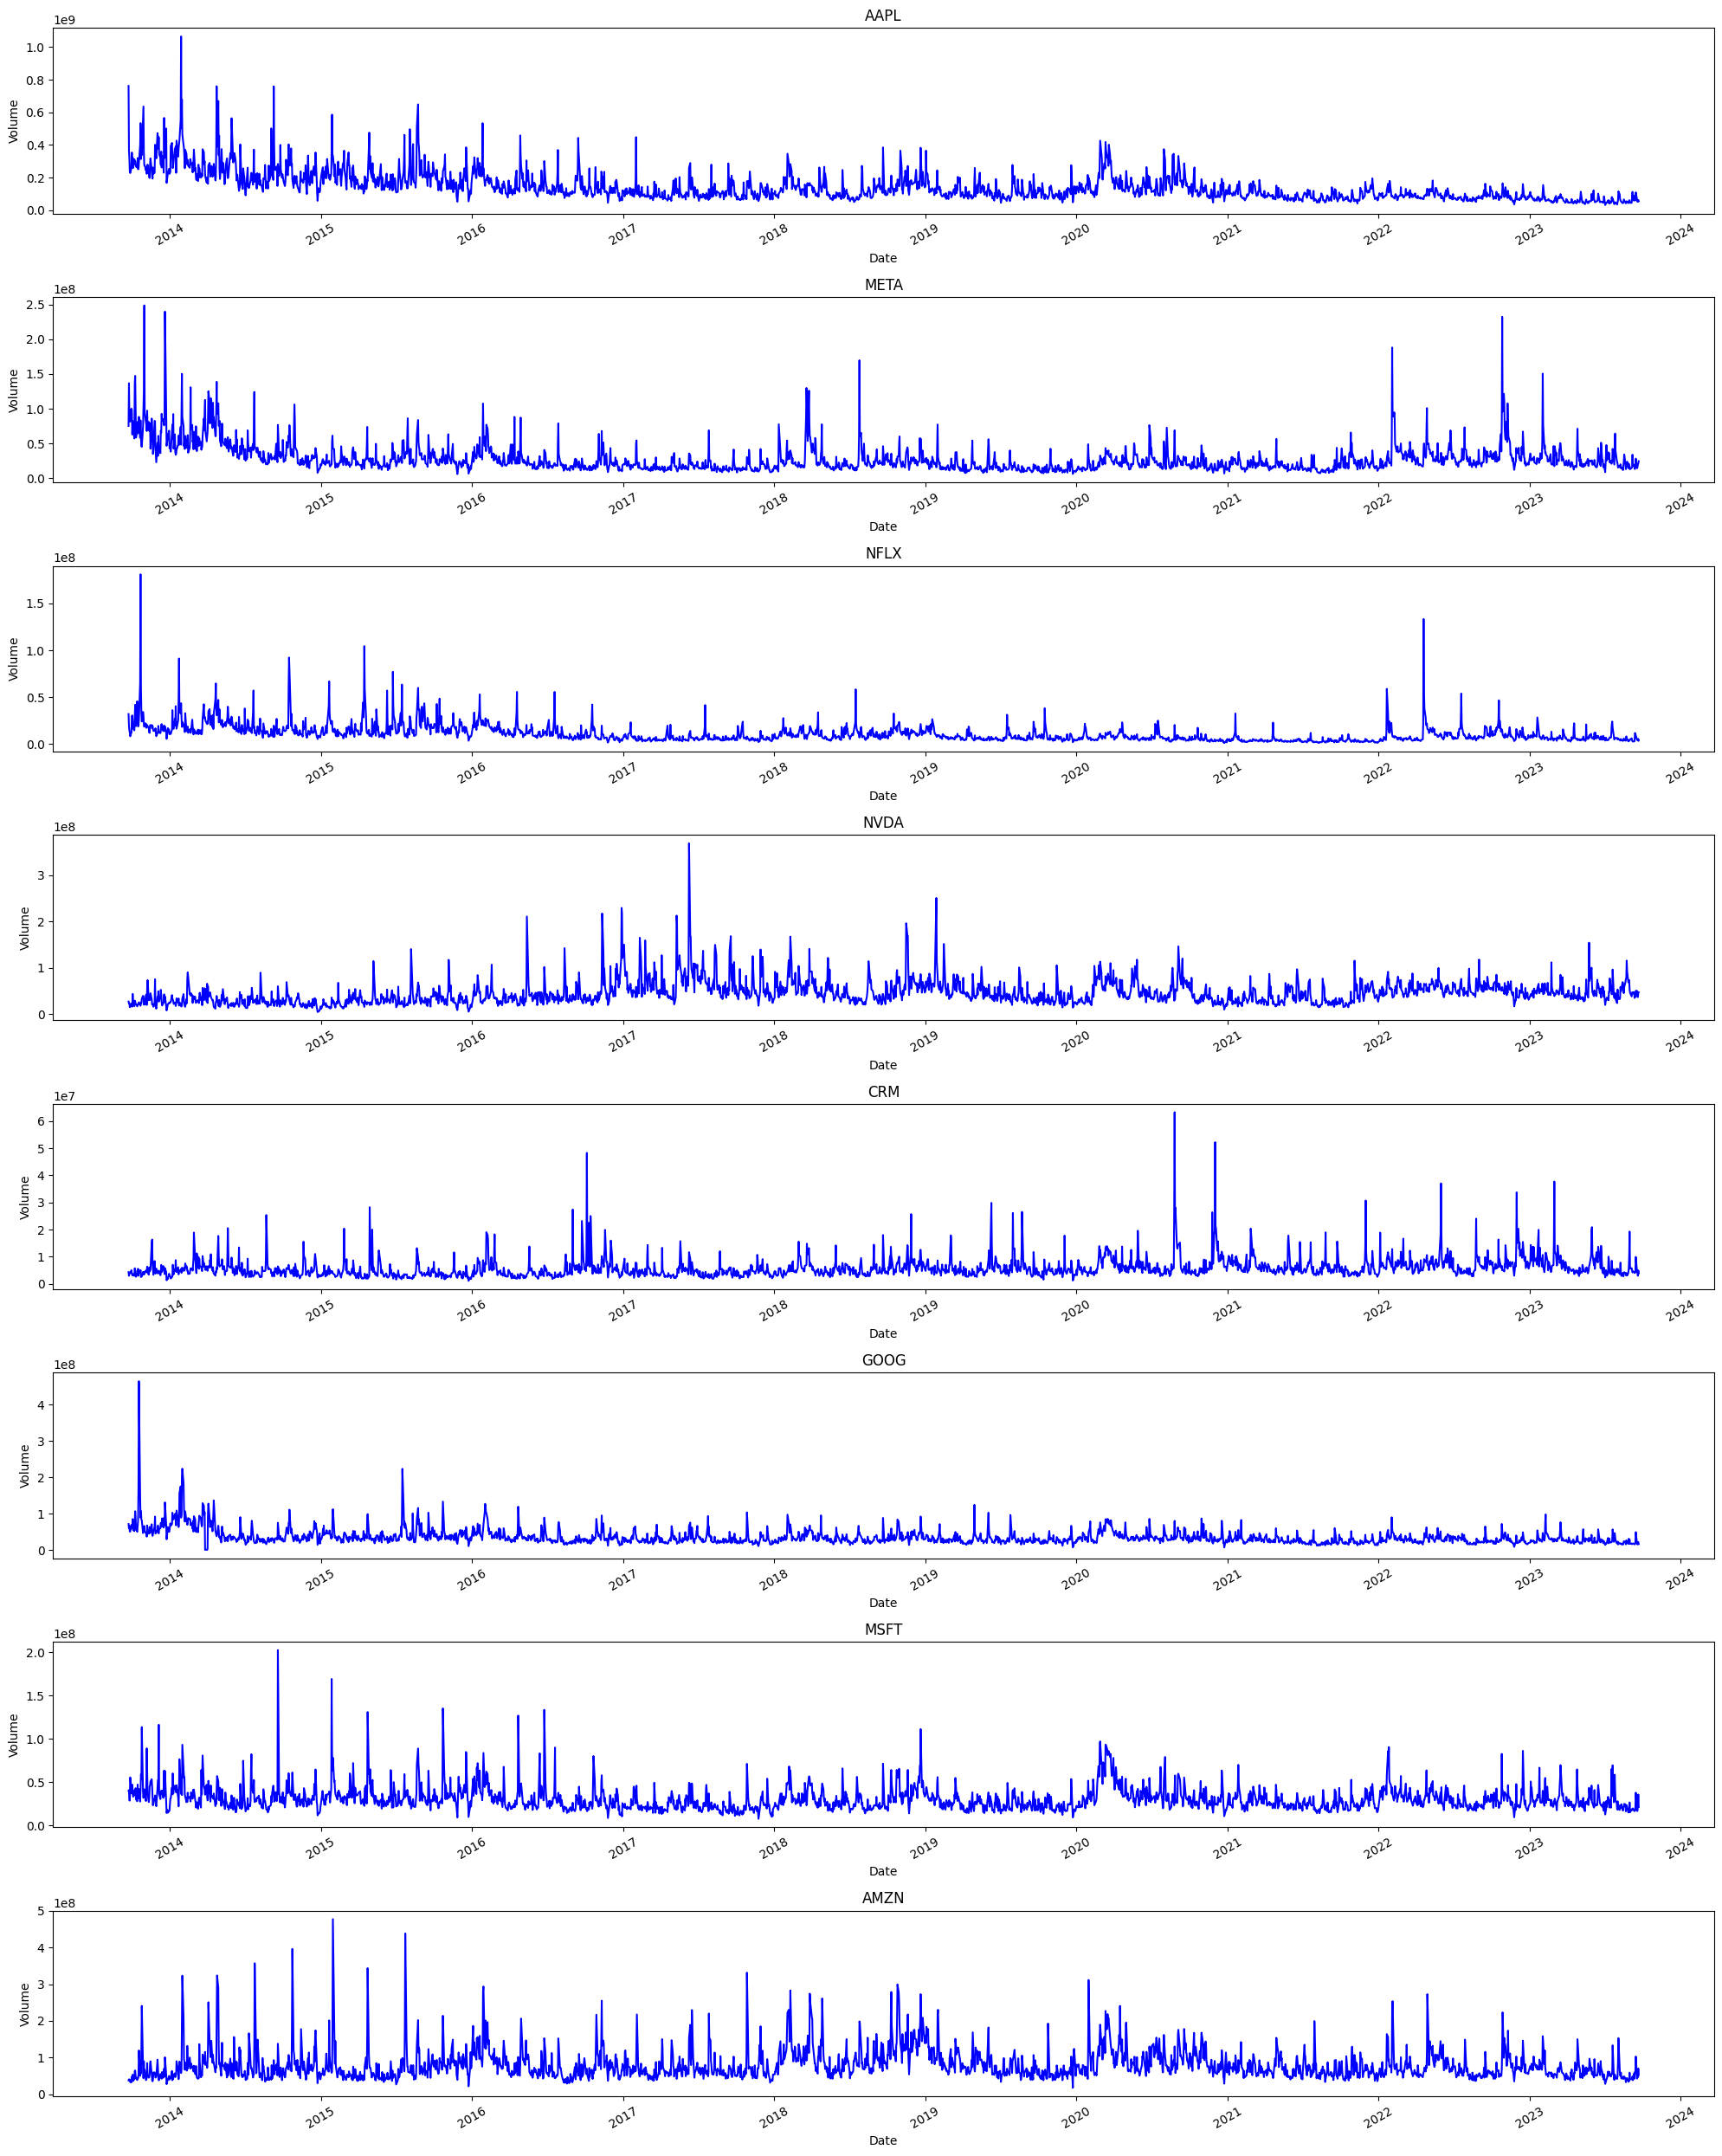

In [27]:
fig = plt.figure(figsize=(20,25))
for i in range(len(TechIndicator)):
    ax = plt.subplot(len(TechIndicator),1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Volume_plain'], 'b')
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Volume")
    plt.xticks(rotation=30)
fig.tight_layout()

## Plot Bollinger Bands

C:\Users\anjal\AppData\Local\Temp\ipykernel_34436\1276424060.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title("Bollinger Bands for " + str(TechIndicator[i]['Label'][0]))


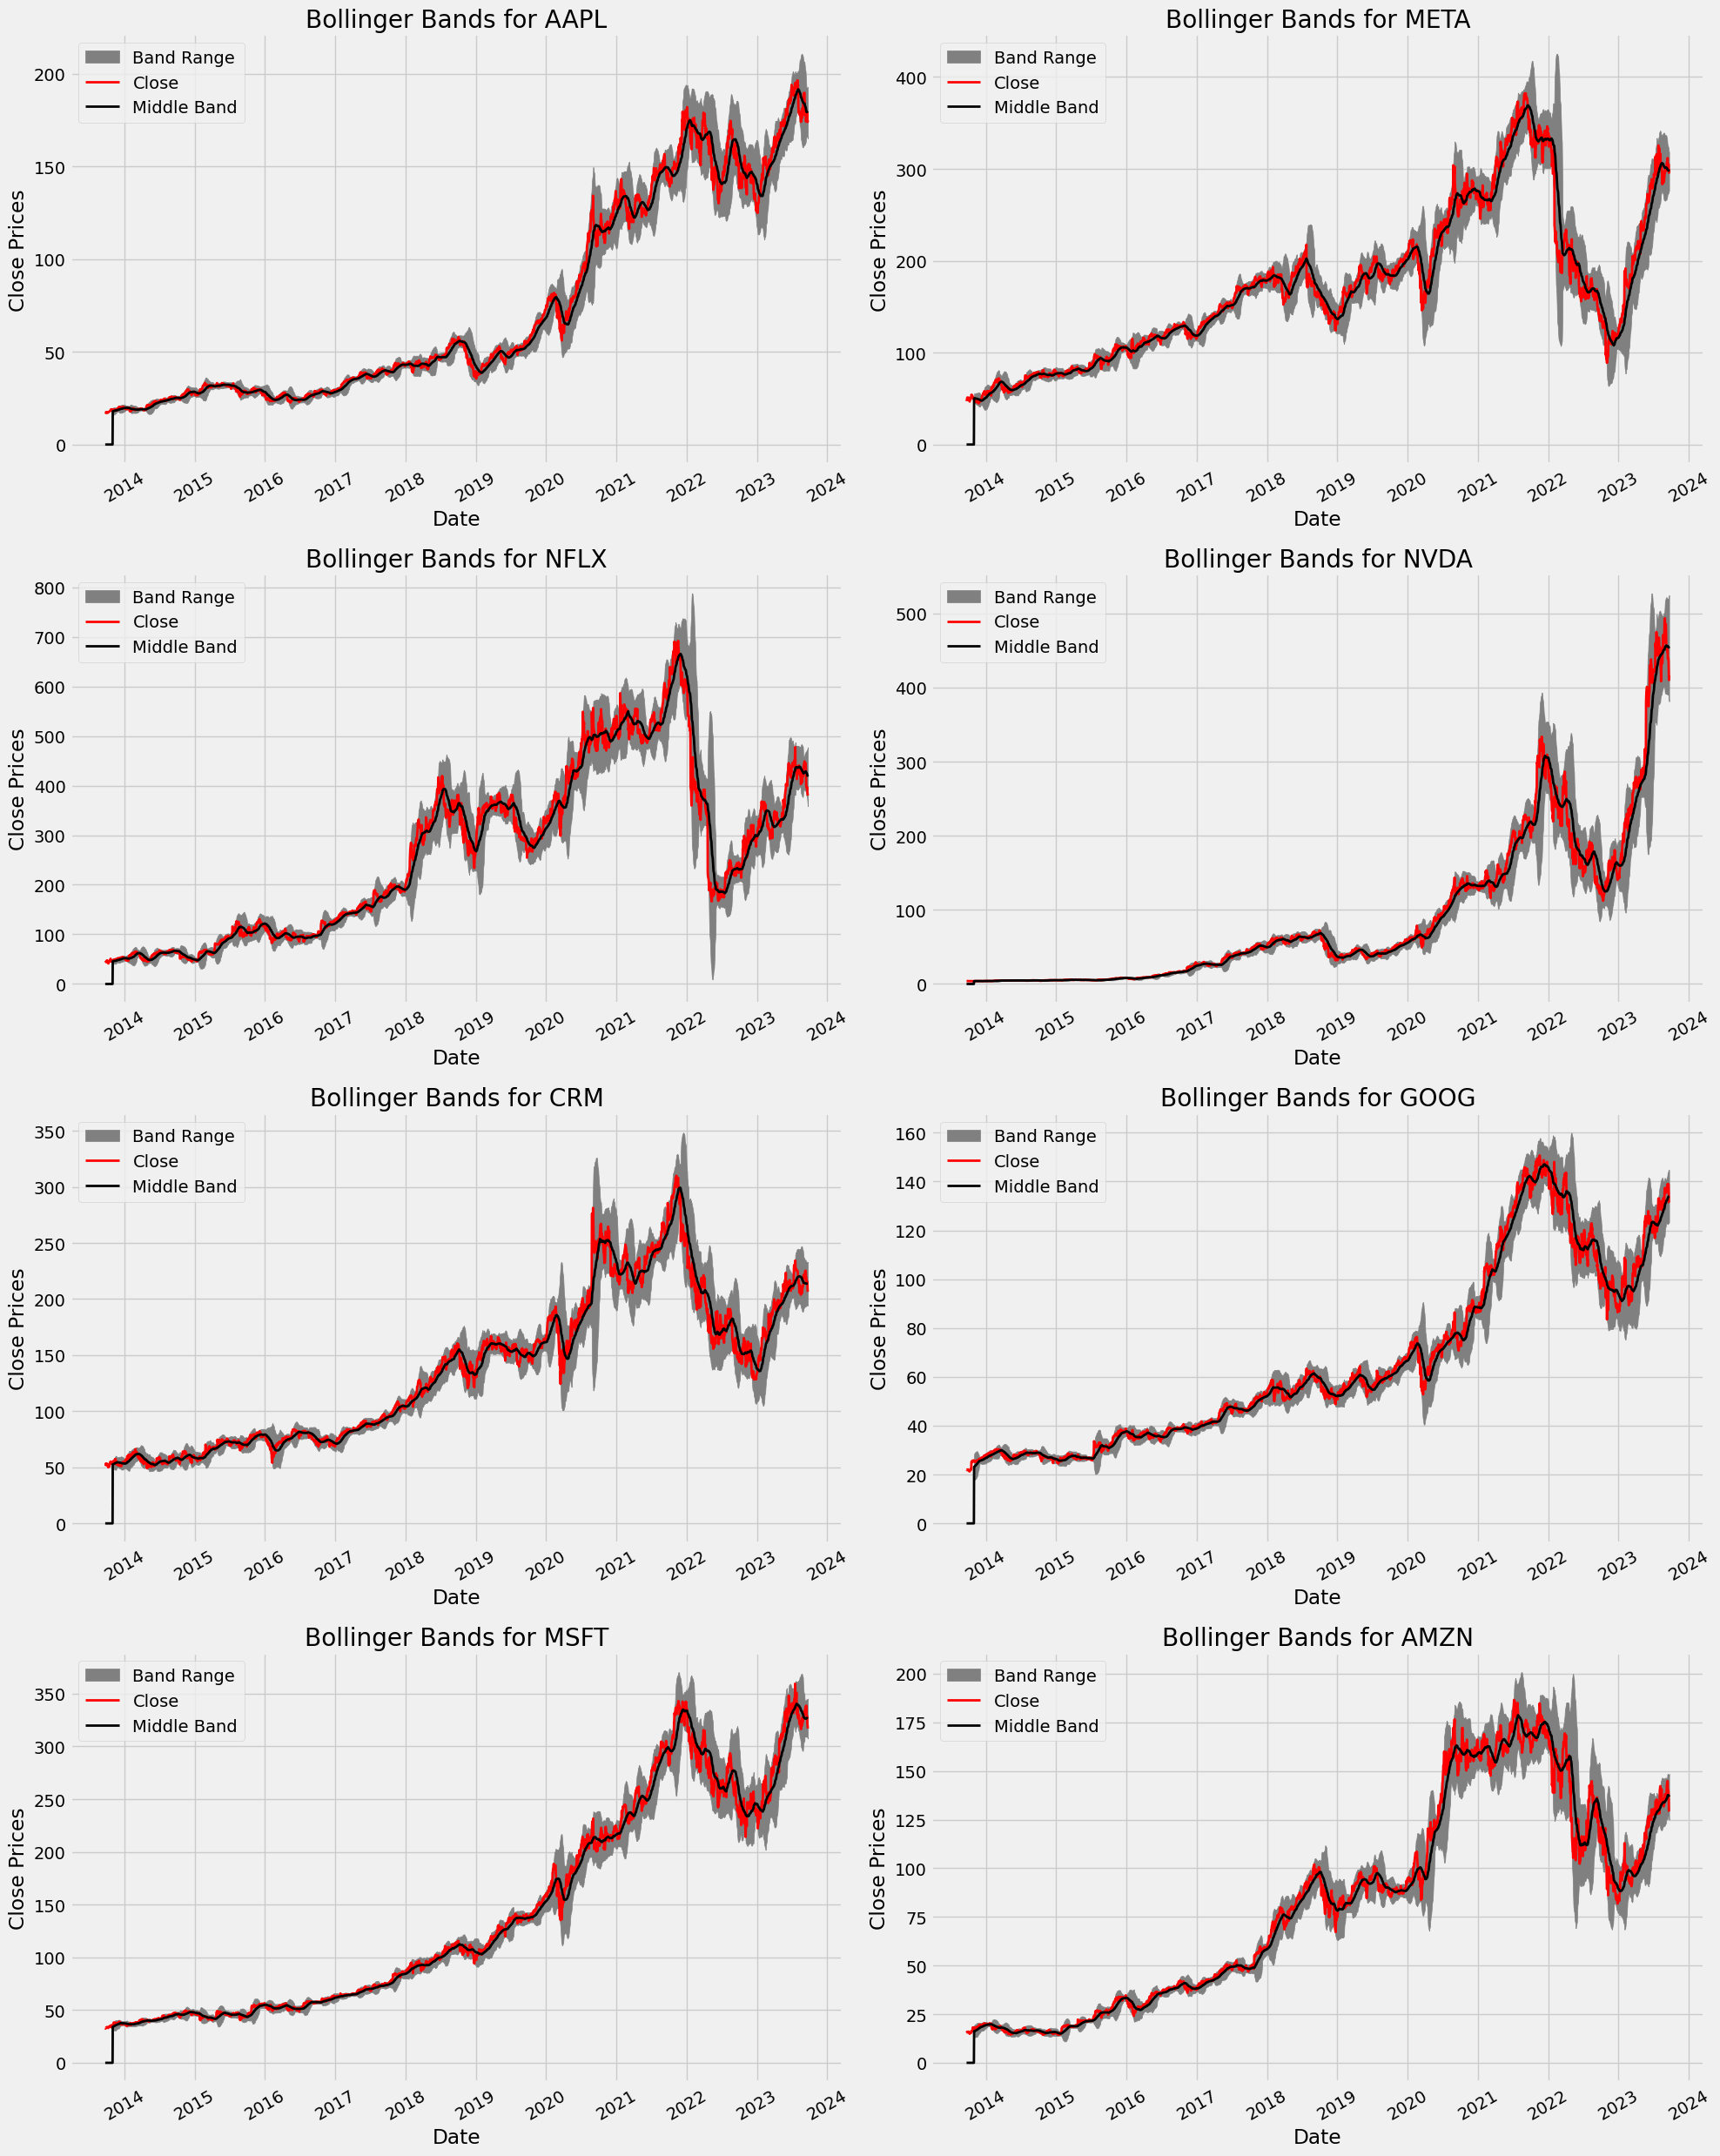

In [28]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(20,25))
for i in range(len(TechIndicator)):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['BB_Upper_Band'], TechIndicator[i]['BB_Lower_Band'], color='grey', label="Band Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label="Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['BB_Middle_Band'], color='black', lw=2, label="Middle Band")
    ax.set_title("Bollinger Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()


# Plot Aroon Oscillators

C:\Users\anjal\AppData\Local\Temp\ipykernel_34436\1552203813.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title("Aroon Oscillator for " +str(TechIndicator[i]['Label'][0]))


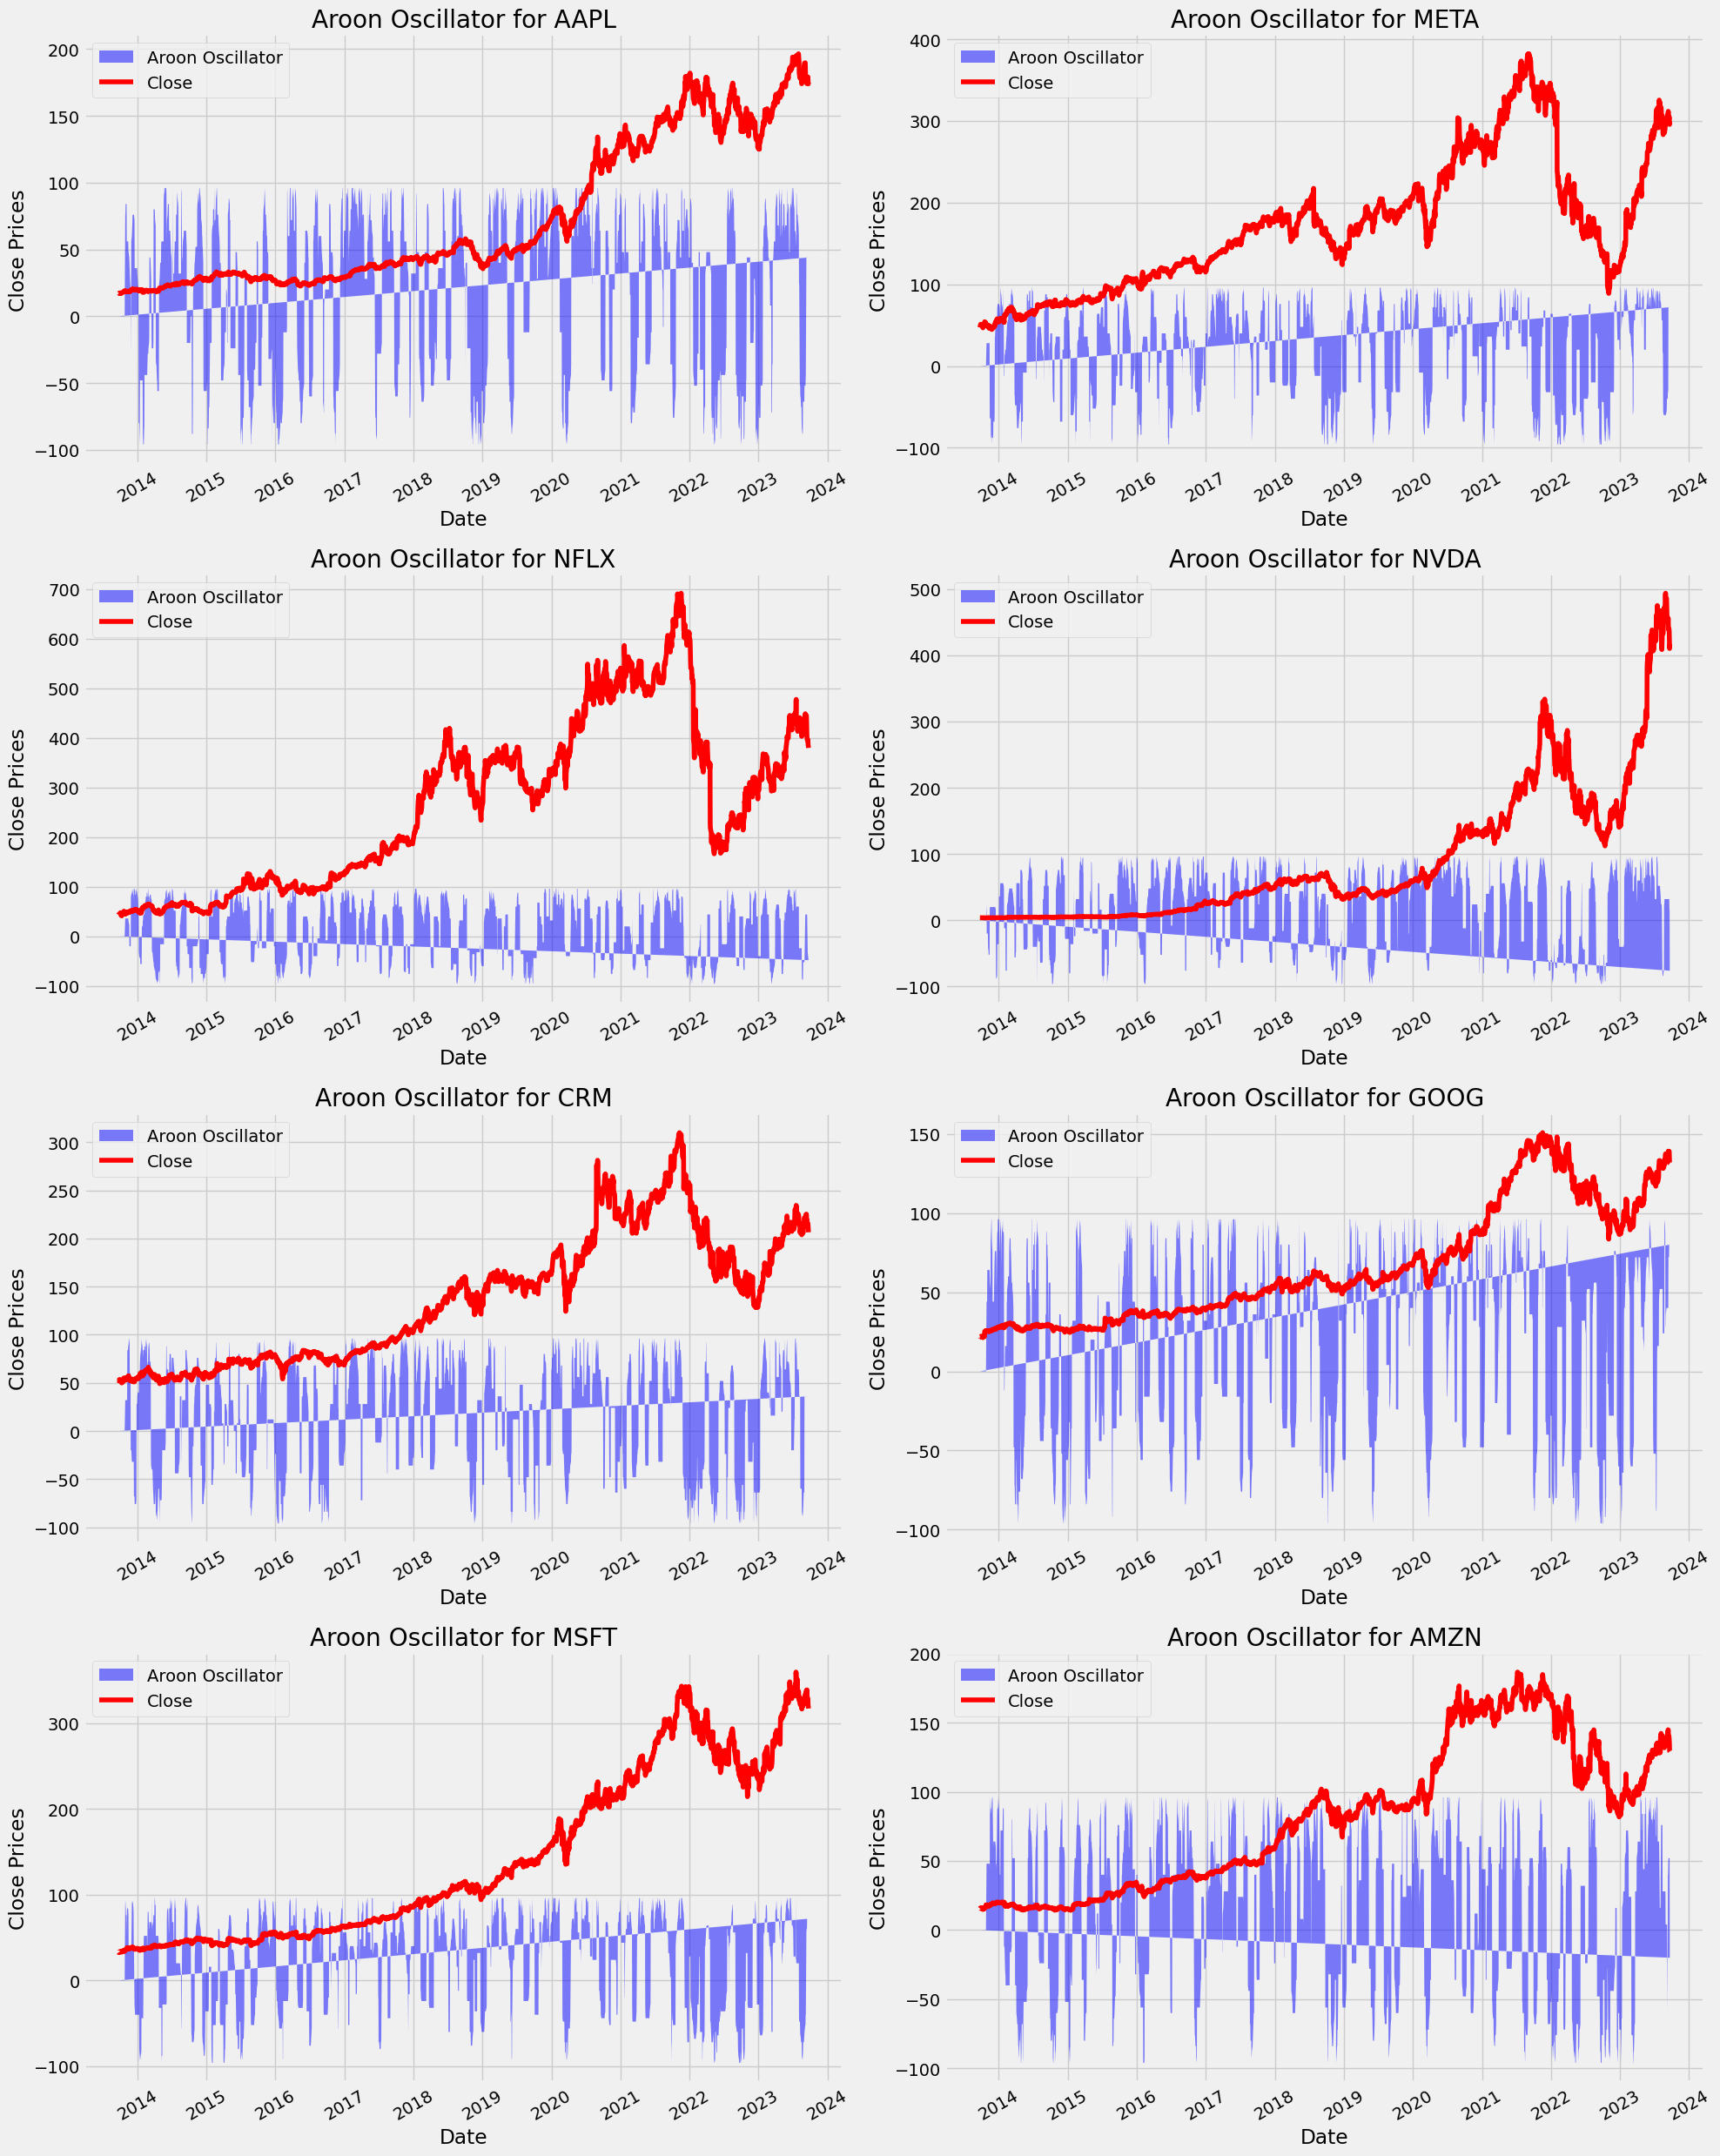

In [29]:
#plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,25))
for i in range(len(TechIndicator)):
    ax = plt.subplot(4,2,i+1)
    ax.fill(TechIndicator[i].index, TechIndicator[i]['Aroon_Oscillator'],'b', alpha = 0.5, label = "Aroon Oscillator")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], 'r', label="Close")
    ax.set_title("Aroon Oscillator for " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

## Plot Price Volume Trend 

C:\Users\anjal\AppData\Local\Temp\ipykernel_34436\900949268.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title("Price Volume Trend of " +str(TechIndicator[i]['Label'][0]))


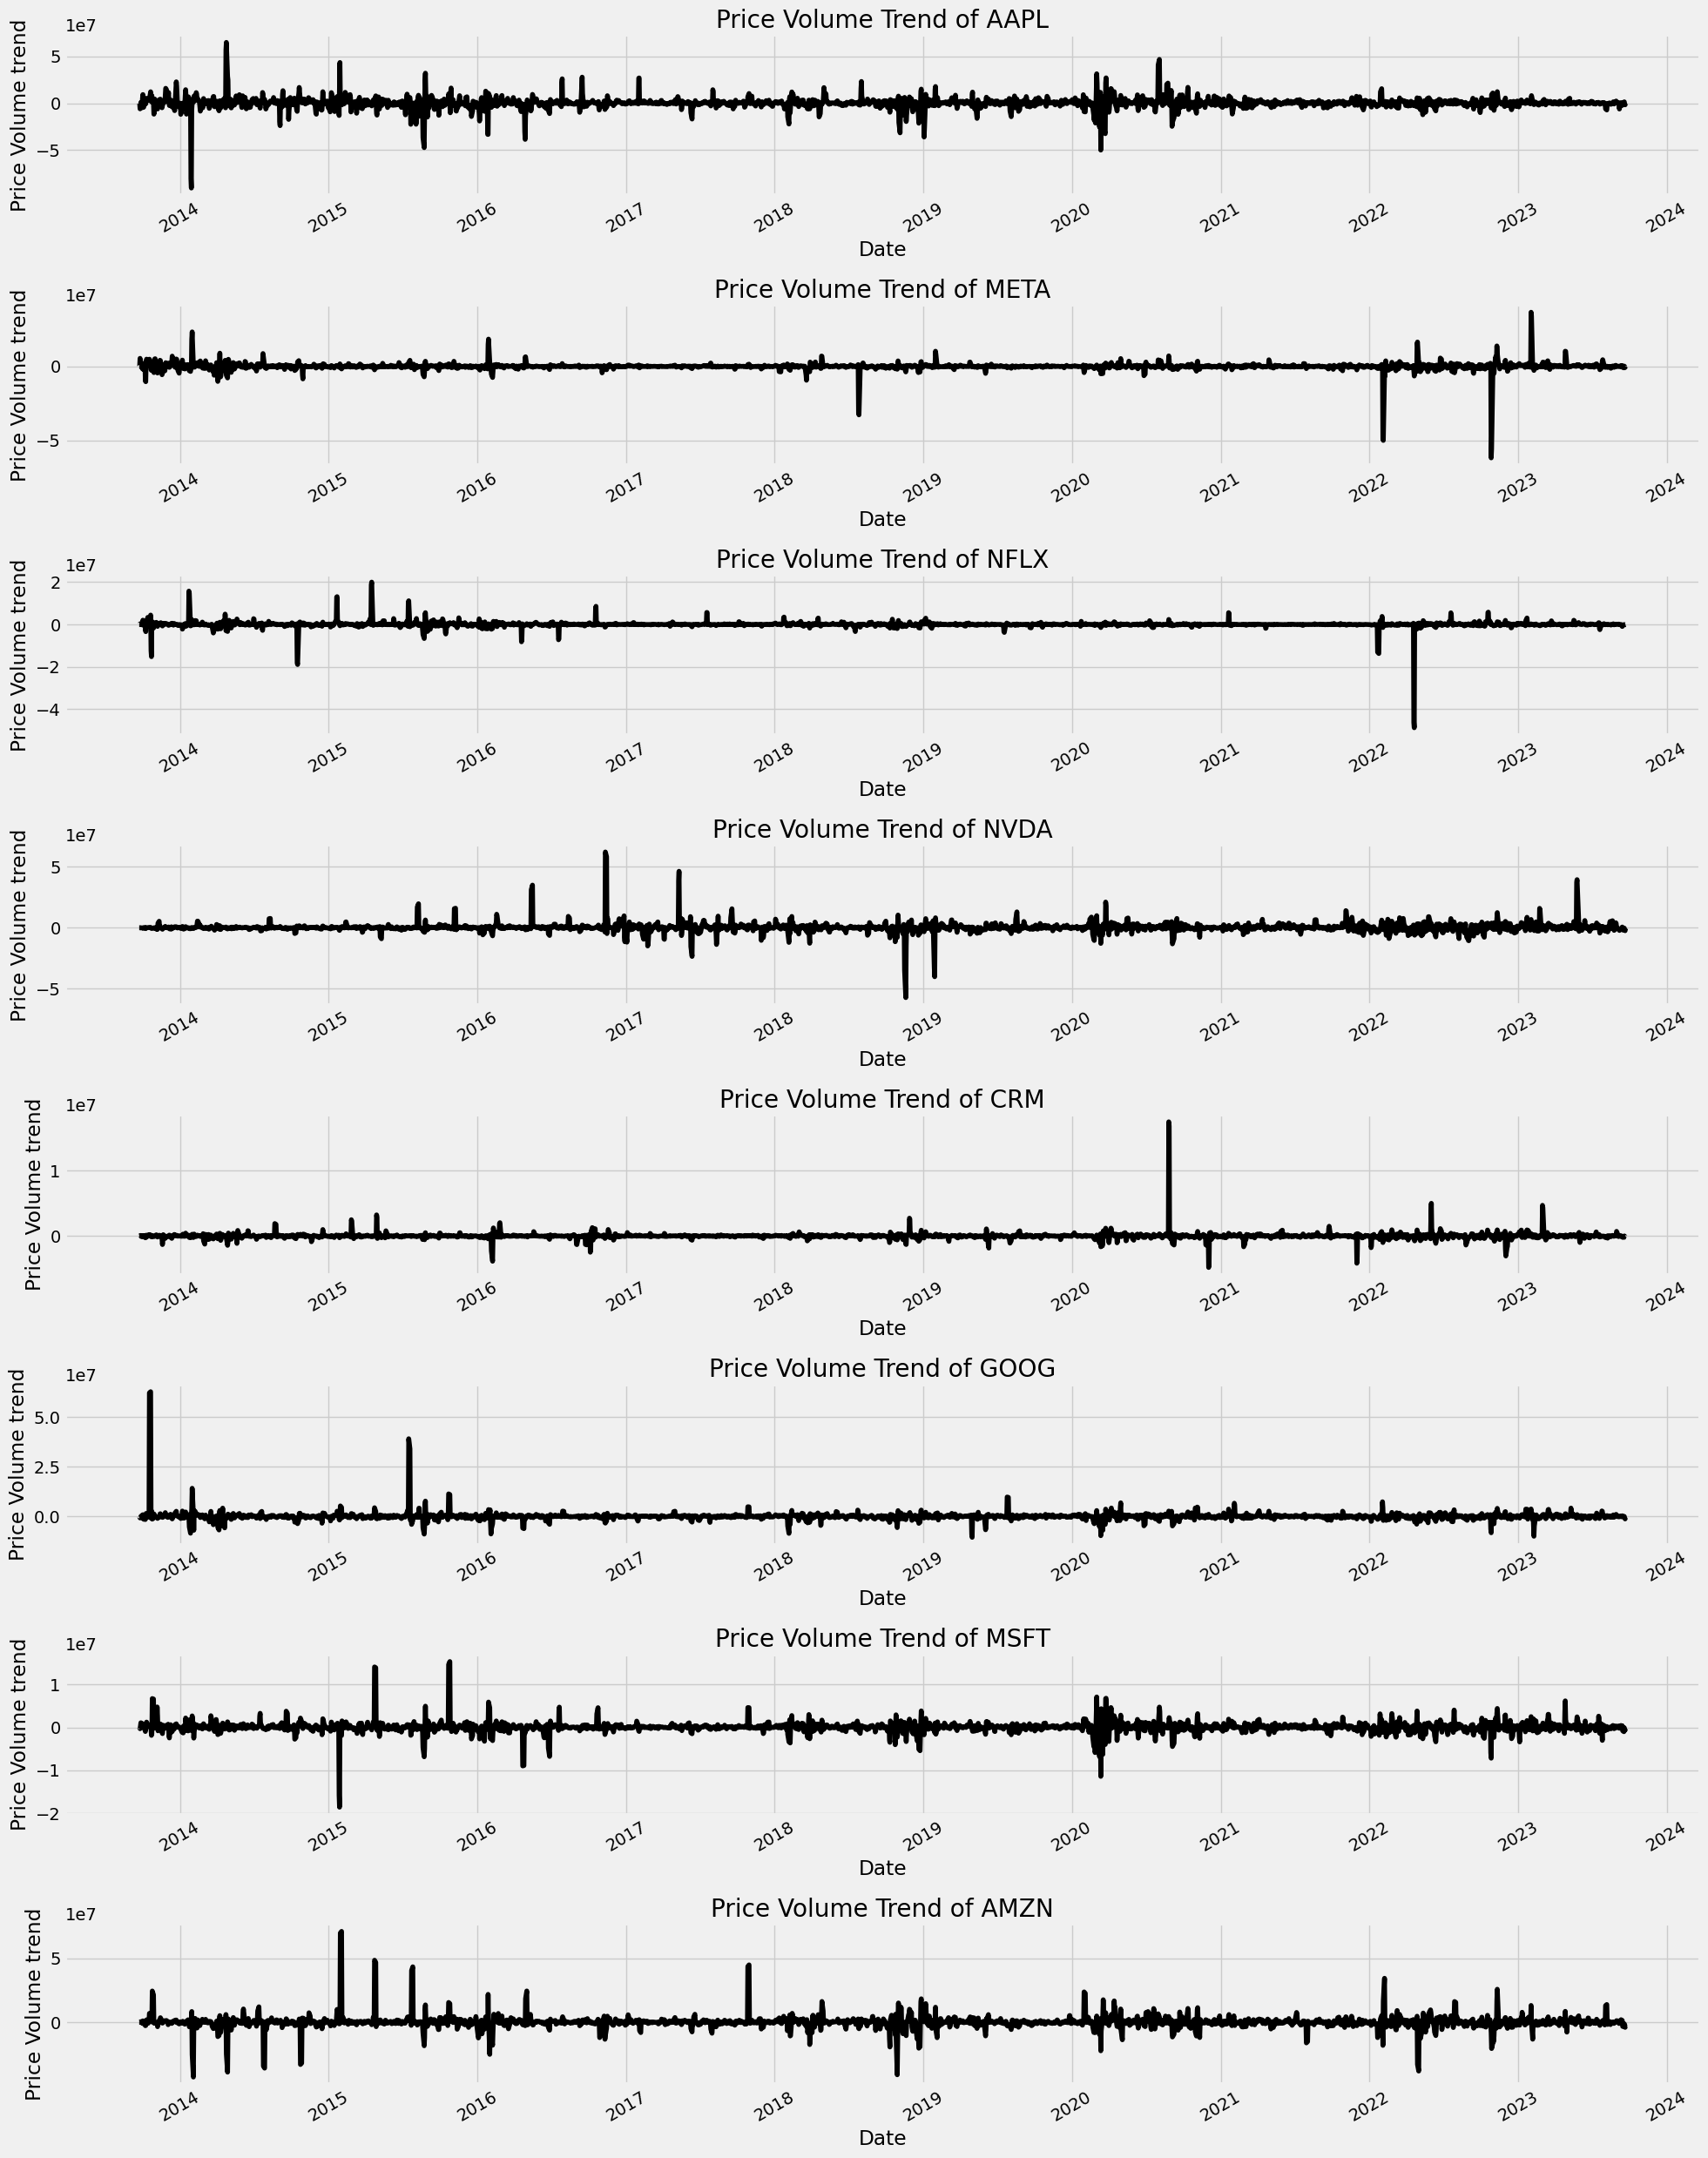

In [30]:
fig = plt.figure(figsize=(20,25))
for i in range(len(TechIndicator)):
    ax = plt.subplot(8,1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['PVT'], 'black')
    ax.set_title("Price Volume Trend of " +str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price Volume trend")
    plt.xticks(rotation=30)
fig.tight_layout()

## Plot Acceleration bands


C:\Users\anjal\AppData\Local\Temp\ipykernel_34436\1520133915.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title("Acceleration Bands for " + str(TechIndicator[i]['Label'][0]))


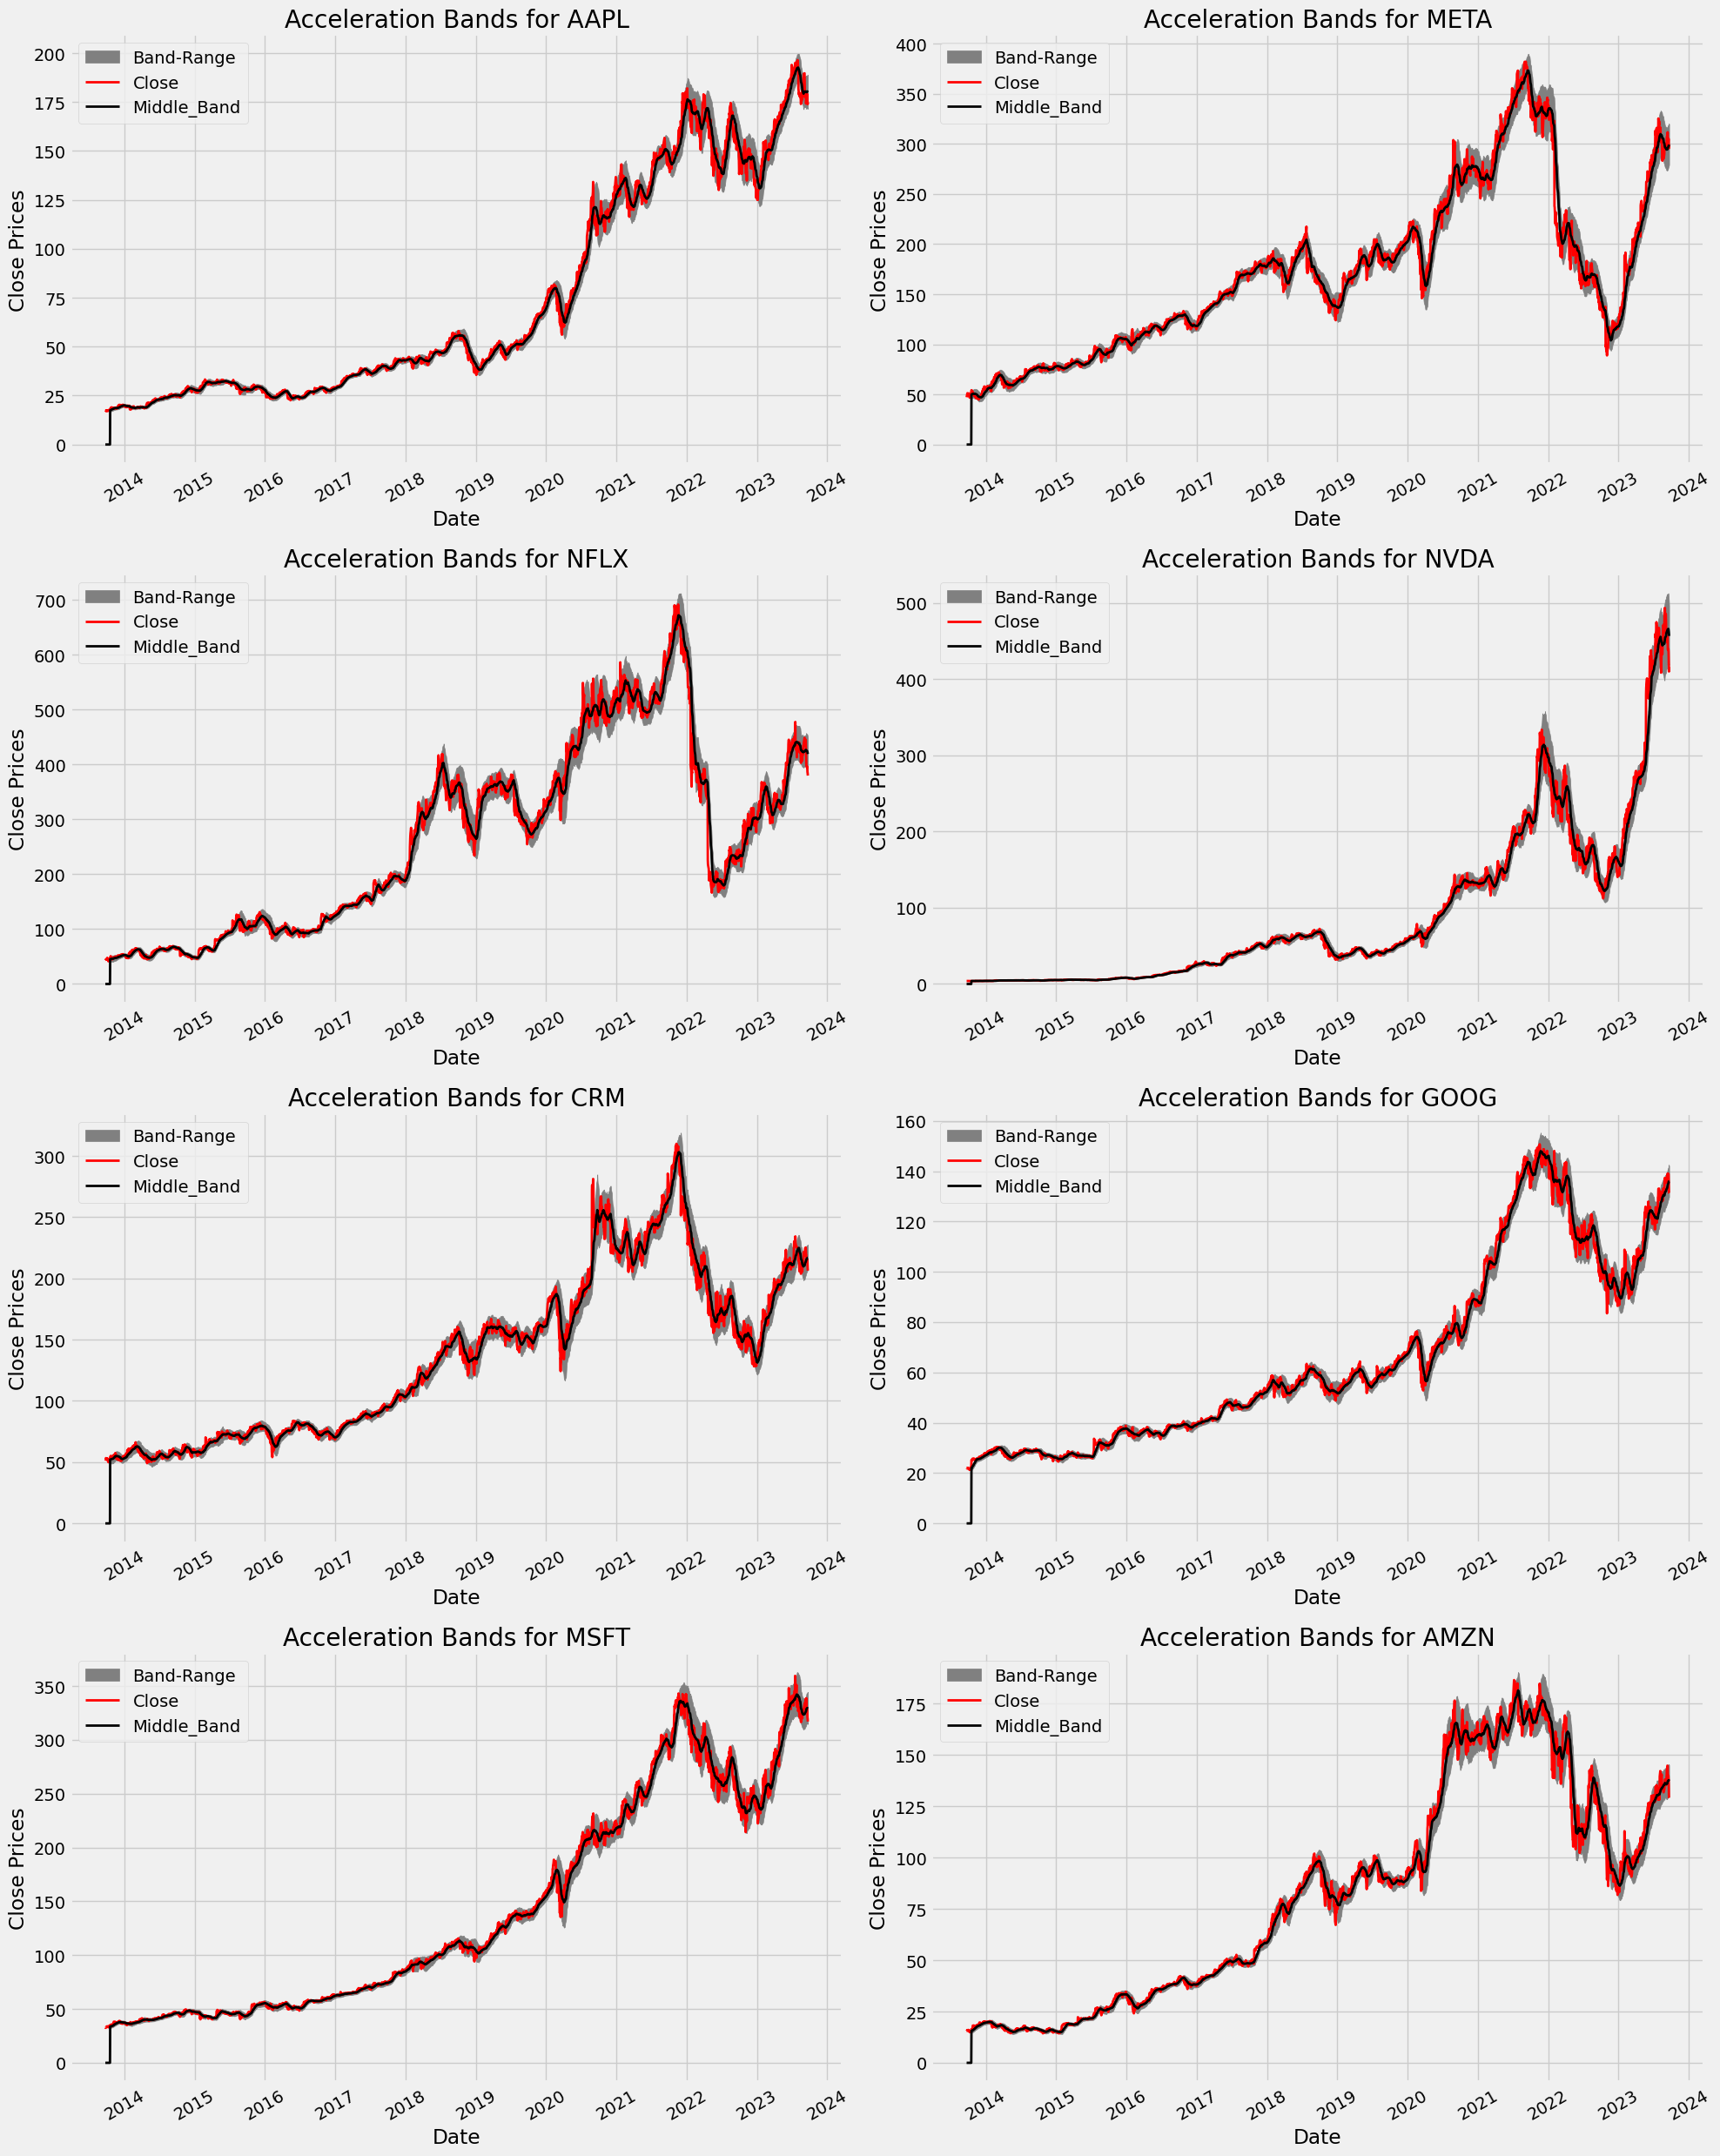

In [31]:
fig = plt.figure(figsize=(20,25))
for i in range(len(TechIndicator)):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['AB_Upper_Band'], TechIndicator[i]['AB_Lower_Band'], color='grey', label = "Band-Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label = "Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['AB_Middle_Band'], color='black', lw=2, label="Middle_Band")
    ax.set_title("Acceleration Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

# Making Predictions Using the Daily Close price
## Let's predict AAPL stock

In [32]:
# Get the stock quote
stock = 'AAPL'
df = pdr.get_data_yahoo(stock, start=start, end=end)
# Show teh data
df.tail()

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-18  176.479996  179.380005  176.169998  177.970001  177.970001   
2023-09-19  177.520004  179.630005  177.130005  179.070007  179.070007   
2023-09-20  179.259995  179.699997  175.399994  175.490005  175.490005   
2023-09-21  174.550003  176.300003  173.860001  173.929993  173.929993   
2023-09-22  174.669998  177.078995  174.054993  174.789993  174.789993   

              Volume  
Date                  
2023-09-18  67257600  
2023-09-19  51826900  
2023-09-20  58436200  
2023-09-21  63047900  
2023-09-22  55110610

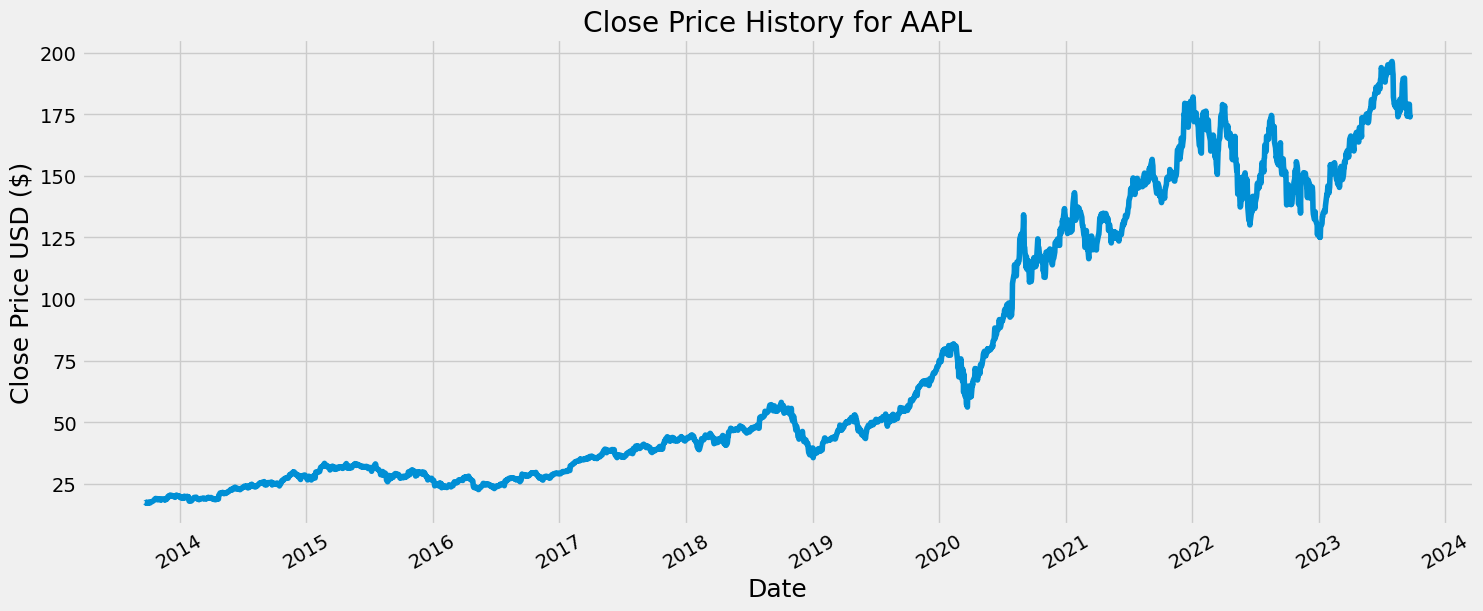

In [33]:
plt.figure(figsize=(16,6))
plt.title('Close Price History for ' + stock)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.xticks(rotation=30)
plt.show()

In [34]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

2015

In [35]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00276481],
       [0.00245827],
       [0.00095146],
       ...,
       [0.88318127],
       [0.87448667],
       [0.87927981]])

In [36]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
print(len(train_data))    
print(len(x_train))
print(len(y_train))
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

2015
1955
1955


In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1955/1955 [==============================] - 47s 22ms/step - loss: 8.4905e-04 - accuracy: 0.0000e+00
Epoch 2/5
1955/1955 [==============================] - 46s 23ms/step - loss: 4.9416e-04 - accuracy: 0.0000e+00
Epoch 3/5
1955/1955 [==============================] - 48s 25ms/step - loss: 3.4846e-04 - accuracy: 0.0000e+00
Epoch 4/5
1955/1955 [==============================] - 51s 26ms/step - loss: 2.3286e-04 - accuracy: 0.0000e+00
Epoch 5/5
1955/1955 [==============================] - 53s 27ms/step - loss: 2.2427e-04 - accuracy: 0.0000e+00


In [38]:
# Create the testing data set

test_data = scaled_data[training_data_len - 60: , :]
print(len(test_data))
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

563
16/16 [==============================] - 1s 28ms/step


6.478310241798007

C:\Users\anjal\AppData\Local\Temp\ipykernel_34436\148748736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


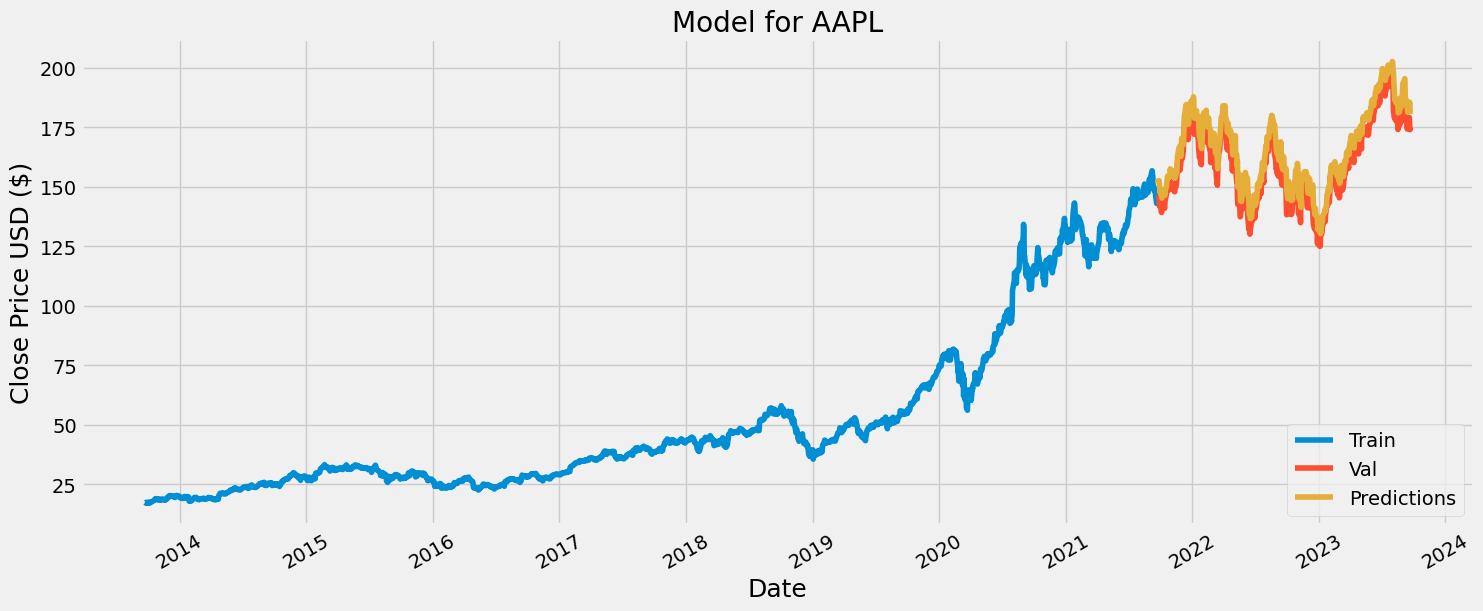

In [39]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model for '  + stock)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.xticks(rotation=30)
plt.show()

In [40]:
# Show the valid and predicted prices
valid.head()



Close  Predictions
Date                               
2021-09-23  146.830002   151.458786
2021-09-24  146.919998   152.455917
2021-09-27  145.369995   152.519333
2021-09-28  141.910004   151.094391
2021-09-29  142.830002   147.918259

In [41]:
valid.tail()

Close  Predictions
Date                               
2023-09-18  177.970001   181.822433
2023-09-19  179.070007   184.353912
2023-09-20  175.490005   185.391678
2023-09-21  173.929993   182.161789
2023-09-22  174.789993   180.566086

C:\Users\anjal\AppData\Local\Temp\ipykernel_34436\3225221059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


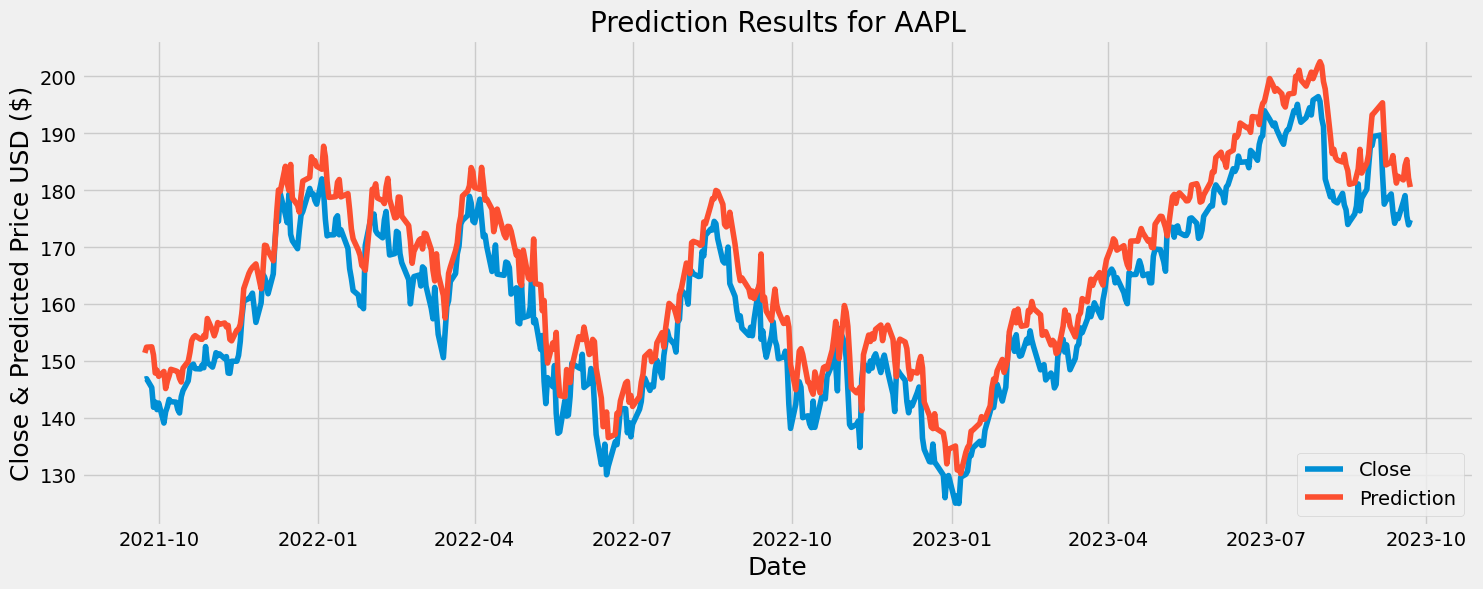

In [42]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Prediction Results for '  + stock)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close & Predicted Price USD ($)', fontsize=18)
plt.plot(valid['Close'])
plt.plot(valid['Prediction'])
plt.legend(['Close','Prediction'], loc='lower right')
plt.show()

# Use different approach

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [44]:

stock = 'AAPL'
dataset = pdr.get_data_yahoo(stock, start=start, end=end)

dataset = dataset.reset_index()
dataset['Date'] = pd.to_datetime(dataset.Date,format='%Y-%m-%d')
dataset.index = dataset['Date']
dataset.head()

[*********************100%%**********************]  1 of 1 completed


Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
2013-09-23 2013-09-23  17.717857  17.746786  17.235714  17.522858  15.293093   
2013-09-24 2013-09-24  17.674286  17.695356  17.422144  17.467857  15.245090   
2013-09-25 2013-09-25  17.471430  17.487143  17.193930  17.197500  15.009133   
2013-09-26 2013-09-26  17.357143  17.448570  17.282143  17.365000  15.155320   
2013-09-27 2013-09-27  17.277857  17.309643  17.168571  17.241072  15.047165   

               Volume  
Date                   
2013-09-23  762106800  
2013-09-24  364344400  
2013-09-25  316957200  
2013-09-26  237221600  
2013-09-27  228040400

In [45]:
dataset = dataset.sort_index(ascending=True, axis=0)
dataset2 = pd.DataFrame(index=range(0,len(dataset)),columns=['Date', 'Close'])

for i in range(0,len(dataset)):
    dataset2['Date'][i] = dataset['Date'][i]
    dataset2['Close'][i] = dataset['Close'][i]
    
dataset2.index = dataset2.Date
dataset2.drop('Date', axis=1, inplace = True)

dataset3 = dataset2.values 

train = dataset3[:training_data_len]
valid = dataset3[training_data_len:]
#print(train)
#print(valid)

C:\Users\anjal\AppData\Local\Temp\ipykernel_34436\633315603.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset2['Date'][i] = dataset['Date'][i]
C:\Users\anjal\AppData\Local\Temp\ipykernel_34436\633315603.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset2['Close'][i] = dataset['Close'][i]


In [46]:

# puts everything between (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset3)
#print(scaled_data)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [47]:
model = Sequential()
model.add(LSTM( units=1000, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=1000))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

1955/1955 - 5998s - loss: 0.0022 - 5998s/epoch - 3s/step


In [48]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
#y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)
#print(X_test.shape)

train = dataset2[:training_data_len]
valid = dataset2[training_data_len:]
valid['Predictions'] = closing_price

16/16 [==============================] - 12s 589ms/step


C:\Users\anjal\AppData\Local\Temp\ipykernel_34436\248450801.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


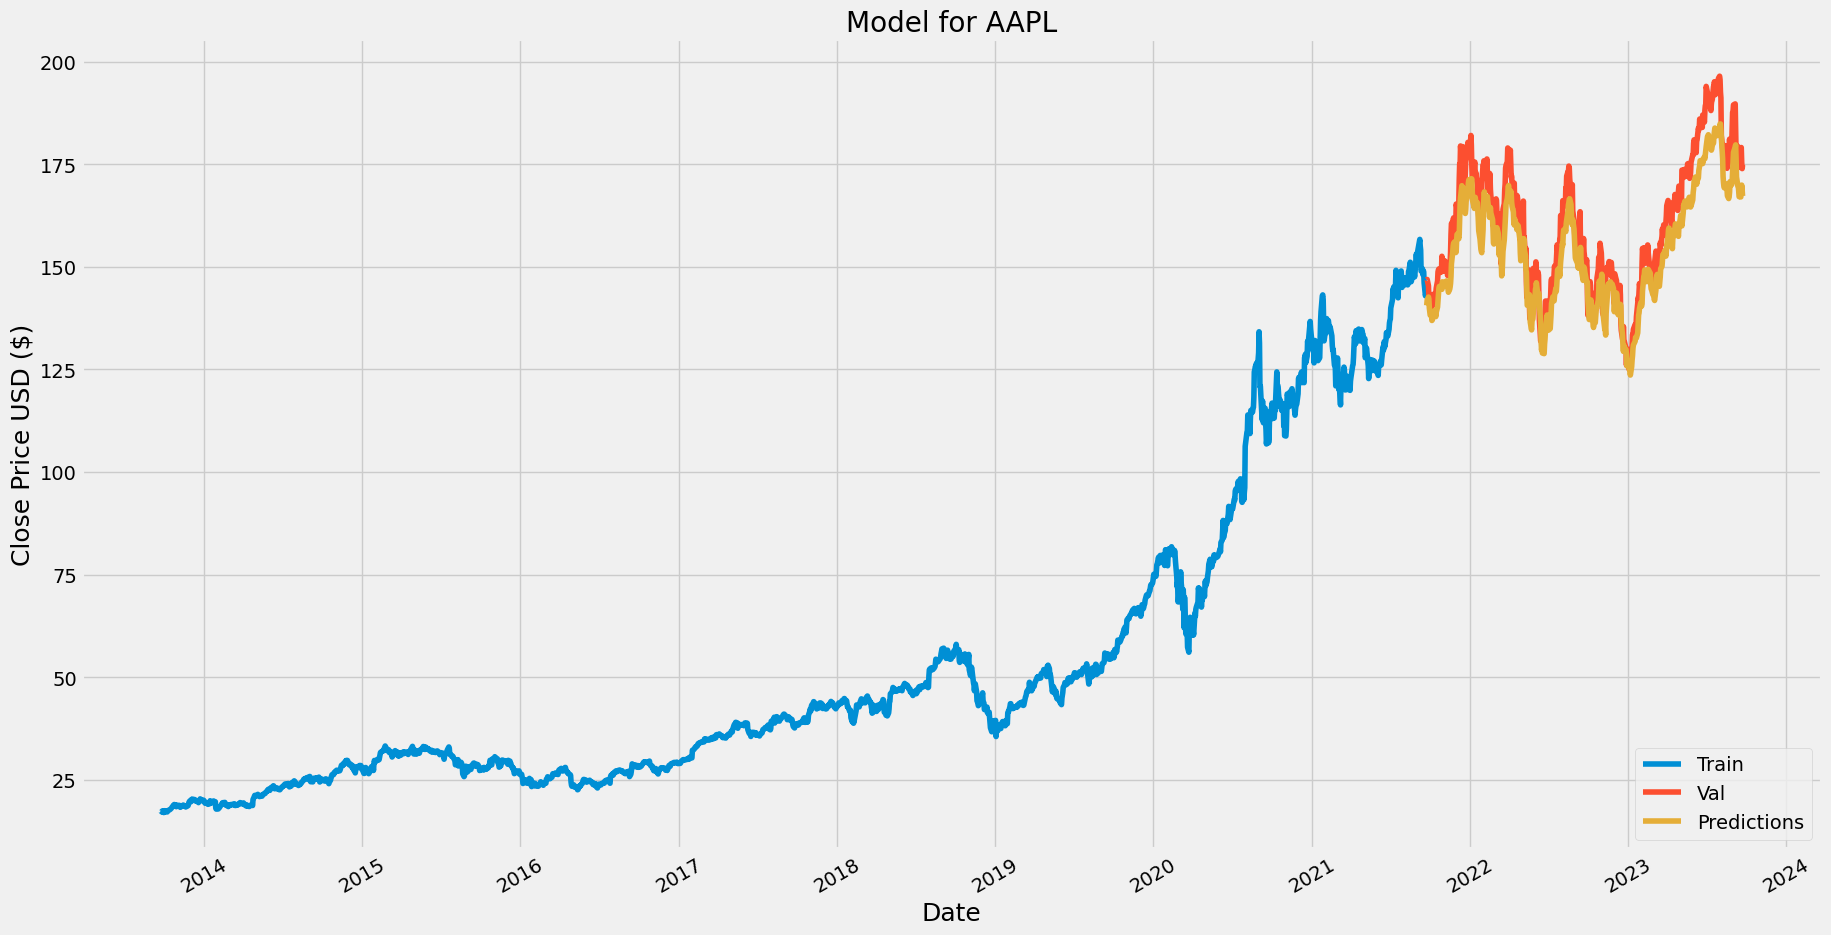

In [49]:
plt.figure(figsize=(20,10))
plt.title('Model for '  + stock)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.xticks(rotation=30)
plt.show()

In [50]:
valid.head()

Close  Predictions
Date                               
2021-09-23  146.830002   140.617554
2021-09-24  146.919998   141.881317
2021-09-27  145.369995   142.643707
2021-09-28  141.910004   142.152374
2021-09-29  142.830002   139.964355

In [51]:
valid.tail()

Close  Predictions
Date                               
2023-09-18  177.970001   167.033859
2023-09-19  179.070007   168.516205
2023-09-20  175.490005   169.913315
2023-09-21  173.929993   168.823807
2023-09-22  174.789993   167.260193

C:\Users\anjal\AppData\Local\Temp\ipykernel_34436\3519483882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


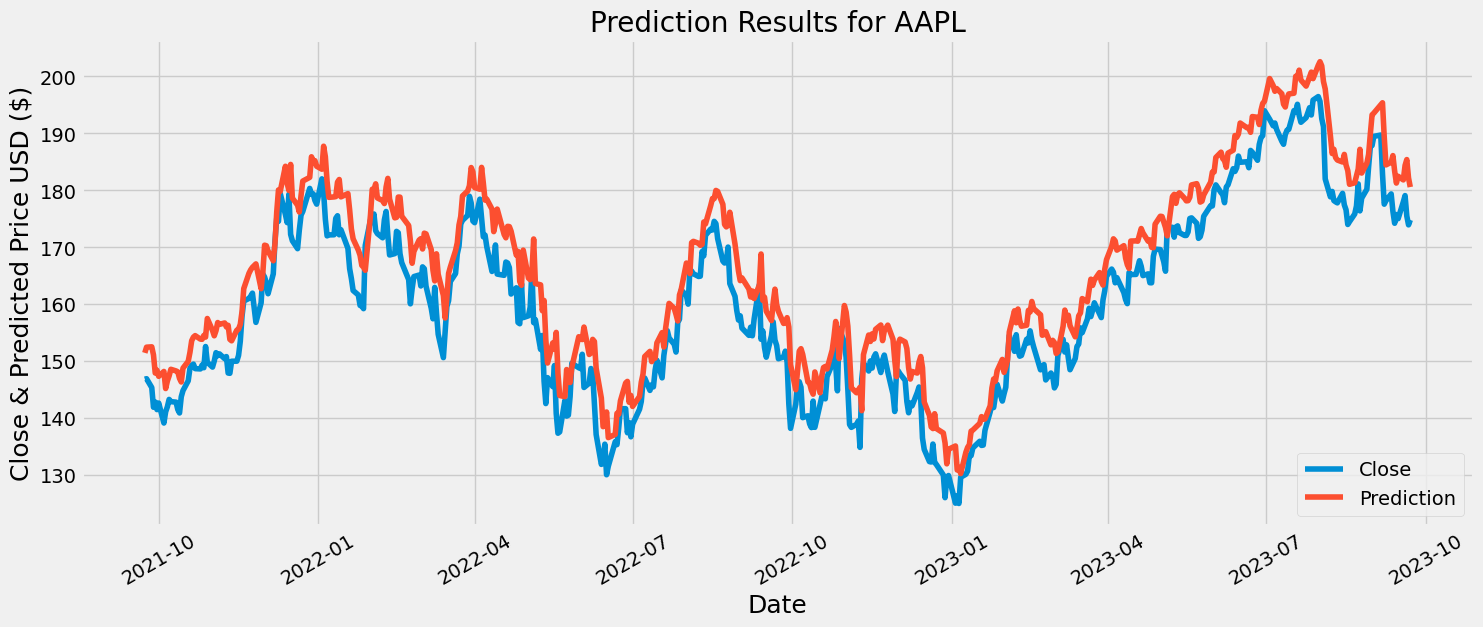

In [52]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Prediction Results for '  + stock)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close & Predicted Price USD ($)', fontsize=18)
plt.plot(valid['Close'])
plt.plot(valid['Prediction'])
plt.legend(['Close','Prediction'], loc='lower right')
plt.xticks(rotation=30)
plt.show()